# Petfinder.my
![](https://3blaws.s3.amazonaws.com/images/3_27.jpg)

- *Best version so far #14*

## * EDA and ML in progress *
## ** * This is a draft version * **

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')

import lightgbm as lgb
import xgboost as xgb

from wordcloud import WordCloud

# Any results you write to the current directory are saved as output.

['train', 'test', 'breed_labels.csv', 'train_sentiment', 'test_sentiment', 'test_metadata', 'train_images', 'train_metadata', 'state_labels.csv', 'color_labels.csv', 'test_images']


### Defining Datatypes

In [2]:
# I am grateful for the help of author of this kernel for the main idea to load the dataset and save memory space!!
# https://www.kaggle.com/theoviel/load-the-totality-of-the-data

train_dtypes = {
        'PetID':                            'str',
        'AdoptionSpeed ':                   'int8',
        'Type':                             'category',
        'Name':                             'str',
        'Age':                              'int8',
        'Breed1':                           'category',
        'Breed2':                           'category',
        'Gender':                           'category',
        'Color1':                           'category',
        'Color2':                           'category',
        'Color3':                           'category',
        'MaturitySize':                     'float16',
        'FurLength':                        'int8',
        'Vaccinated':                       'category',
        'Dewormed':                         'category',
        'Sterilized':                       'category',
        'Health':                           'category',
        'Quantity':                         'uint16',
        'State':                            'category',
        'Fee':                              'float',
        'RescuerID':                        'category',
        'VideoAmt':                         'uint16',
        'PhotoAmt':                         'uint16',
        'Description ':                     'str'
        }

breeds_dtypes = {
        'BreedID':                          'category',
        'Type ':                            'category',
        'BreedName':                        'str'
        }

colors_dtypes = {
        'ColorID':                          'category',
        'ColorName':                        'str'
        }

states_dtypes = {
        'StateID':                          'category',
        'StateName':                        'str'
        }

### Loading the datasets

In [3]:
breeds = pd.read_csv('../input/breed_labels.csv', dtype=breeds_dtypes)
colors = pd.read_csv('../input/color_labels.csv',  dtype=colors_dtypes)
states = pd.read_csv('../input/state_labels.csv', dtype=states_dtypes)

train = pd.read_csv('../input/train/train.csv', dtype=train_dtypes)
test = pd.read_csv('../input/test/test.csv', dtype=train_dtypes)


train['dataset_type'] = 'train'
test['dataset_type'] = 'test'
train_and_test = pd.concat([train, test])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


In [4]:
train_and_test.head()

,AdoptionSpeed,Age,Breed1,Breed2,Color1,Color2,Color3,Description,Dewormed,Fee,FurLength,Gender,Health,MaturitySize,Name,PetID,PhotoAmt,Quantity,RescuerID,State,Sterilized,Type,Vaccinated,VideoAmt,dataset_type
0,2.0,3,299,0,1,7,0,Nibble is a 3+ month old ball of cuteness. He ...,2,100.0,1,1,1,1.0,Nibble,86e1089a3,1,1,8480853f516546f6cf33aa88cd76c379,41326,2,2,2,0,train
1,0.0,1,265,0,1,2,0,I just found it alone yesterday near my apartm...,3,0.0,2,1,1,2.0,No Name Yet,6296e909a,2,1,3082c7125d8fb66f7dd4bff4192c8b14,41401,3,2,3,0,train
2,3.0,1,307,0,2,7,0,Their pregnant mother was dumped by her irresp...,1,0.0,2,1,1,2.0,Brisco,3422e4906,7,1,fa90fa5b1ee11c86938398b60abc32cb,41326,2,1,1,0,train
3,2.0,4,307,0,1,2,0,"Good guard dog, very alert, active, obedience ...",1,150.0,1,2,1,2.0,Miko,5842f1ff5,8,1,9238e4f44c71a75282e62f7136c6b240,41401,2,1,1,0,train
4,2.0,1,307,0,1,0,0,This handsome yet cute boy is up for adoption....,2,0.0,1,1,1,2.0,Hunter,850a43f90,3,1,95481e953f8aed9ec3d16fc4509537e8,41326,2,1,2,0,train


In [5]:
train.describe()

,Age,MaturitySize,FurLength,Quantity,Fee,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,10.042286,1.862305,1.467485,1.576069,21.259988,0.056760,3.889215,2.516441
std,17.520097,0.547852,0.599070,1.472477,78.414548,0.346185,3.487810,1.177265
min,-124.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,2.000000,2.000000
50%,3.000000,2.000000,1.000000,1.000000,0.000000,0.000000,3.000000,2.000000
75%,11.000000,2.000000,2.000000,1.000000,0.000000,0.000000,5.000000,4.000000
max,123.000000,4.000000,3.000000,20.000000,3000.000000,8.000000,30.000000,4.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 25 columns):
Type             14993 non-null category
Name             13736 non-null object
Age              14993 non-null int8
Breed1           14993 non-null category
Breed2           14993 non-null category
Gender           14993 non-null category
Color1           14993 non-null category
Color2           14993 non-null category
Color3           14993 non-null category
MaturitySize     14993 non-null float16
FurLength        14993 non-null int8
Vaccinated       14993 non-null category
Dewormed         14993 non-null category
Sterilized       14993 non-null category
Health           14993 non-null category
Quantity         14993 non-null uint16
Fee              14993 non-null float64
State            14993 non-null category
RescuerID        14993 non-null category
VideoAmt         14993 non-null uint16
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt 

## Exploratory Data Analysis

In [7]:
train.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed',
       'dataset_type'],
      dtype='object')

In [8]:
train.shape

(14993, 25)

In [9]:
train.isna().sum()

Type                0
Name             1257
Age                 0
Breed1              0
Breed2              0
Gender              0
Color1              0
Color2              0
Color3              0
MaturitySize        0
FurLength           0
Vaccinated          0
Dewormed            0
Sterilized          0
Health              0
Quantity            0
Fee                 0
State               0
RescuerID           0
VideoAmt            0
Description        12
PetID               0
PhotoAmt            0
AdoptionSpeed       0
dataset_type        0
dtype: int64

In [10]:
train_and_test.shape

(18941, 25)

In [11]:
train.AdoptionSpeed.value_counts()

4    4197
2    4037
3    3259
1    3090
0     410
Name: AdoptionSpeed, dtype: int64

In [12]:
train.AdoptionSpeed.value_counts() * 100 / train.shape[0]

4    27.993063
2    26.925899
3    21.736811
1    20.609618
0     2.734609
Name: AdoptionSpeed, dtype: float64

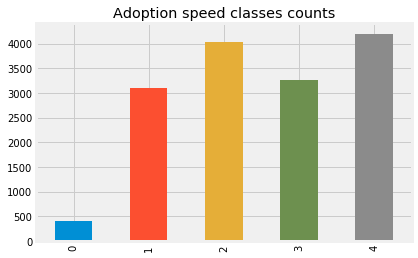

In [13]:
train['AdoptionSpeed'].value_counts().sort_index().plot('bar');
plt.title('Adoption speed classes counts');

### Joining Dataframes
- Train and Test with Breeds

In [14]:
breeds["Breed1"] = breeds.BreedID
#breeds.drop("BreedID", axis="columns", inplace=True)
#breeds.drop("Type", axis="columns", inplace=True)

train_and_test_with_breeds = pd.merge(train_and_test, breeds[["Breed1", "BreedName"]], how= 'left',
                                      on="Breed1")

train_and_test_with_breeds["BreedName_1"] = train_and_test_with_breeds.BreedName
train_and_test_with_breeds.drop("BreedName", axis="columns", inplace=True)

breeds["Breed2"] = breeds.Breed1
train_and_test_with_breeds = pd.merge(train_and_test_with_breeds, breeds[["Breed2", "BreedName"]], how= 'left',
                                      on="Breed2")

train_and_test_with_breeds["BreedName_2"] = train_and_test_with_breeds.BreedName
train_and_test_with_breeds.drop("BreedName", axis="columns", inplace=True)
 
train_and_test_with_breeds.head(4)
#all_data_and_breeds = pd.merge(all_data, breeds, on="")

,AdoptionSpeed,Age,Breed1,Breed2,Color1,Color2,Color3,Description,Dewormed,Fee,FurLength,Gender,Health,MaturitySize,Name,PetID,PhotoAmt,Quantity,RescuerID,State,Sterilized,Type,Vaccinated,VideoAmt,dataset_type,BreedName_1,BreedName_2
0,2.0,3,299,0,1,7,0,Nibble is a 3+ month old ball of cuteness. He ...,2,100.0,1,1,1,1.0,Nibble,86e1089a3,1,1,8480853f516546f6cf33aa88cd76c379,41326,2,2,2,0,train,Tabby,NaN
1,0.0,1,265,0,1,2,0,I just found it alone yesterday near my apartm...,3,0.0,2,1,1,2.0,No Name Yet,6296e909a,2,1,3082c7125d8fb66f7dd4bff4192c8b14,41401,3,2,3,0,train,Domestic Medium Hair,NaN
2,3.0,1,307,0,2,7,0,Their pregnant mother was dumped by her irresp...,1,0.0,2,1,1,2.0,Brisco,3422e4906,7,1,fa90fa5b1ee11c86938398b60abc32cb,41326,2,1,1,0,train,Mixed Breed,NaN
3,2.0,4,307,0,1,2,0,"Good guard dog, very alert, active, obedience ...",1,150.0,1,2,1,2.0,Miko,5842f1ff5,8,1,9238e4f44c71a75282e62f7136c6b240,41401,2,1,1,0,train,Mixed Breed,NaN


In [15]:
train_and_test_with_breeds.shape

(18941, 27)

### Joining Dataframes
- Train and Test and Breeds with Color Dataframe

In [16]:
colors["Color1"] = colors.ColorID
#breeds.drop("BreedID", axis="columns", inplace=True)
#breeds.drop("Type", axis="columns", inplace=True)

train_and_test_with_breeds_colors = pd.merge(train_and_test_with_breeds, colors[["Color1", "ColorName"]], 
                                             how= 'left', on="Color1")

train_and_test_with_breeds_colors["ColorName_1"] = train_and_test_with_breeds_colors.ColorName
train_and_test_with_breeds_colors.drop("ColorName", axis="columns", inplace=True)

colors["Color2"] = colors.ColorID
train_and_test_with_breeds_colors = pd.merge(train_and_test_with_breeds_colors, colors[["Color2", "ColorName"]], 
                                      how= 'left', on="Color2")

train_and_test_with_breeds_colors["ColorName_2"] = train_and_test_with_breeds_colors.ColorName
train_and_test_with_breeds_colors.drop("ColorName", axis="columns", inplace=True)

colors["Color3"] = colors.ColorID
train_and_test_with_breeds_colors = pd.merge(train_and_test_with_breeds_colors, colors[["Color3", "ColorName"]], 
                                      how= 'left', on="Color3")

train_and_test_with_breeds_colors["ColorName_3"] = train_and_test_with_breeds_colors.ColorName
train_and_test_with_breeds_colors.drop("ColorName", axis="columns", inplace=True)
 
train_and_test_with_breeds_colors.head(4)
#all_data_and_breeds = pd.merge(all_data, breeds, on="")

,AdoptionSpeed,Age,Breed1,Breed2,Color1,Color2,Color3,Description,Dewormed,Fee,FurLength,Gender,Health,MaturitySize,Name,PetID,PhotoAmt,Quantity,RescuerID,State,Sterilized,Type,Vaccinated,VideoAmt,dataset_type,BreedName_1,BreedName_2,ColorName_1,ColorName_2,ColorName_3
0,2.0,3,299,0,1,7,0,Nibble is a 3+ month old ball of cuteness. He ...,2,100.0,1,1,1,1.0,Nibble,86e1089a3,1,1,8480853f516546f6cf33aa88cd76c379,41326,2,2,2,0,train,Tabby,NaN,Black,White,NaN
1,0.0,1,265,0,1,2,0,I just found it alone yesterday near my apartm...,3,0.0,2,1,1,2.0,No Name Yet,6296e909a,2,1,3082c7125d8fb66f7dd4bff4192c8b14,41401,3,2,3,0,train,Domestic Medium Hair,NaN,Black,Brown,NaN
2,3.0,1,307,0,2,7,0,Their pregnant mother was dumped by her irresp...,1,0.0,2,1,1,2.0,Brisco,3422e4906,7,1,fa90fa5b1ee11c86938398b60abc32cb,41326,2,1,1,0,train,Mixed Breed,NaN,Brown,White,NaN
3,2.0,4,307,0,1,2,0,"Good guard dog, very alert, active, obedience ...",1,150.0,1,2,1,2.0,Miko,5842f1ff5,8,1,9238e4f44c71a75282e62f7136c6b240,41401,2,1,1,0,train,Mixed Breed,NaN,Black,Brown,NaN


In [17]:
train_and_test_with_breeds_colors.shape

(18941, 30)

 ### Joining Dataframes #3
- Train and Test and Breeds and Colors with States Dataframe

In [18]:
states["State"] = states.StateID
#breeds.drop("BreedID", axis="columns", inplace=True)
#breeds.drop("Type", axis="columns", inplace=True)

train_and_test_with_breeds_colors_states = pd.merge(train_and_test_with_breeds_colors, states[["State", "StateName"]], 
                                             how= 'left', on="State")

'''
train_and_test_with_breeds_colors_states["ColorName_1"] = train_and_test_with_breeds_colors.ColorName
train_and_test_with_breeds_colors.drop("ColorName", axis="columns", inplace=True)

colors["Color2"] = colors.ColorID
train_and_test_with_breeds_colors = pd.merge(train_and_test_with_breeds_colors, colors[["Color2", "ColorName"]], 
                                      how= 'left', on="Color2")

train_and_test_with_breeds_colors["ColorName_2"] = train_and_test_with_breeds_colors.ColorName
train_and_test_with_breeds_colors.drop("ColorName", axis="columns", inplace=True)

colors["Color3"] = colors.ColorID
train_and_test_with_breeds_colors = pd.merge(train_and_test_with_breeds_colors, colors[["Color3", "ColorName"]], 
                                      how= 'left', on="Color3")

train_and_test_with_breeds_colors["ColorName_3"] = train_and_test_with_breeds_colors.ColorName
train_and_test_with_breeds_colors.drop("ColorName", axis="columns", inplace=True)
'''
 
train_and_test_with_breeds_colors_states.head(4)
#all_data_and_breeds = pd.merge(all_data, breeds, on="")

,AdoptionSpeed,Age,Breed1,Breed2,Color1,Color2,Color3,Description,Dewormed,Fee,FurLength,Gender,Health,MaturitySize,Name,PetID,PhotoAmt,Quantity,RescuerID,State,Sterilized,Type,Vaccinated,VideoAmt,dataset_type,BreedName_1,BreedName_2,ColorName_1,ColorName_2,ColorName_3,StateName
0,2.0,3,299,0,1,7,0,Nibble is a 3+ month old ball of cuteness. He ...,2,100.0,1,1,1,1.0,Nibble,86e1089a3,1,1,8480853f516546f6cf33aa88cd76c379,41326,2,2,2,0,train,Tabby,NaN,Black,White,NaN,Selangor
1,0.0,1,265,0,1,2,0,I just found it alone yesterday near my apartm...,3,0.0,2,1,1,2.0,No Name Yet,6296e909a,2,1,3082c7125d8fb66f7dd4bff4192c8b14,41401,3,2,3,0,train,Domestic Medium Hair,NaN,Black,Brown,NaN,Kuala Lumpur
2,3.0,1,307,0,2,7,0,Their pregnant mother was dumped by her irresp...,1,0.0,2,1,1,2.0,Brisco,3422e4906,7,1,fa90fa5b1ee11c86938398b60abc32cb,41326,2,1,1,0,train,Mixed Breed,NaN,Brown,White,NaN,Selangor
3,2.0,4,307,0,1,2,0,"Good guard dog, very alert, active, obedience ...",1,150.0,1,2,1,2.0,Miko,5842f1ff5,8,1,9238e4f44c71a75282e62f7136c6b240,41401,2,1,1,0,train,Mixed Breed,NaN,Black,Brown,NaN,Kuala Lumpur


In [19]:
train_and_test_with_breeds_colors_states.shape

(18941, 31)

In [20]:
train_and_test_with_breeds_colors_states.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18941 entries, 0 to 18940
Data columns (total 31 columns):
AdoptionSpeed    14993 non-null float64
Age              18941 non-null int8
Breed1           18941 non-null object
Breed2           18941 non-null object
Color1           18941 non-null category
Color2           18941 non-null object
Color3           18941 non-null object
Description      18927 non-null object
Dewormed         18941 non-null category
Fee              18941 non-null float64
FurLength        18941 non-null int8
Gender           18941 non-null category
Health           18941 non-null category
MaturitySize     18941 non-null float16
Name             17381 non-null object
PetID            18941 non-null object
PhotoAmt         18941 non-null uint16
Quantity         18941 non-null uint16
RescuerID        18941 non-null object
State            18941 non-null object
Sterilized       18941 non-null category
Type             18941 non-null category
Vaccinated       18941

### Distriguish between categorical and numerical columns:

In [21]:
categorical_columns = list(train_and_test_with_breeds_colors_states.loc[:, ((train_and_test_with_breeds_colors_states.dtypes =="category") | (train_and_test_with_breeds_colors_states.dtypes =="object"))].columns)
numerical_columns = list(train_and_test_with_breeds_colors_states.loc[:, ~((train_and_test_with_breeds_colors_states.dtypes =="category") | (train_and_test_with_breeds_colors_states.dtypes =="object"))].columns)



In [22]:
categorical_columns.remove("PetID")
categorical_columns.remove("RescuerID")
categorical_columns.remove("Description")
categorical_columns.remove("dataset_type")
categorical_columns.remove("BreedName_1")
categorical_columns.remove("BreedName_2")
categorical_columns.remove("ColorName_1")
categorical_columns.remove("ColorName_2")
categorical_columns.remove("ColorName_3")
categorical_columns.remove("Name")
categorical_columns.remove("StateName")

print(categorical_columns)

['Breed1', 'Breed2', 'Color1', 'Color2', 'Color3', 'Dewormed', 'Gender', 'Health', 'State', 'Sterilized', 'Type', 'Vaccinated']


In [23]:
numerical_columns.remove("AdoptionSpeed")

print(numerical_columns)

['Age', 'Fee', 'FurLength', 'MaturitySize', 'PhotoAmt', 'Quantity', 'VideoAmt']


In [24]:
def categorical_univariate_and_bivariate_stats(df, feature):
    
    train_sample = df
    
    if feature in train_sample.columns:
    
        print("Top 10 most occurred categories for the categorical feature", feature)
        print(train_sample[feature].value_counts().head(10))

        f, axes = plt.subplots(1, 2, figsize=(21, 10))

        train_sample[feature].value_counts().head(10).plot.bar(ax=axes[0], colormap="BrBG")

        #train_sample.groupby(["AdoptionSpeed", feature]).count()["PetID"].unstack(0).sort_values(by=1, axis=0, ascending=False).head(10).plot.bar(ax=axes[1], colormap="coolwarm")
        train_sample.groupby(["AdoptionSpeed", feature]).count()["PetID"].unstack(0).head(10).plot.bar(ax=axes[1], colormap="coolwarm")

        
        f.suptitle("Categorical feature: "+" Univariate and Bivariate plots against the target variable")
        
    else:
        print("This feature has been removed from dataset due to high NaN rate or highly unbalanced values")
        
        
def logistic_fit(df, feature):
    
    import warnings
    warnings.filterwarnings("ignore")
    
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import r2_score
    '''
    train_sample = df

    if feature in train_sample.columns:
        
        from sklearn.linear_model import LogisticRegression
        
        f, axes = plt.subplots(1, 2, figsize=(21, 10))

        # test if there is a logistic relationship between the feature1 and the target.
        print()
        print("Fitting a logistic regression model for the feature", feature,"against the target variable")
        
               
        mask = ~train_sample[feature].isnull() & ~train_sample["AdoptionSpeed"].isnull()

        logmodel = LogisticRegression(C=1e5, solver='lbfgs')
        
        if feature in categorical_columns:        
            logmodel.fit(train_sample[feature][mask].cat.codes.values.reshape(-1,1), train_sample["AdoptionSpeed"][mask])
            predictions = logmodel.predict(train_sample[feature][mask].cat.codes.values.reshape(-1,1))
        else:
            logmodel.fit(train_sample[feature][mask].values.reshape(-1,1), train_sample["AdoptionSpeed"][mask])
            predictions = logmodel.predict(train_sample[feature][mask].values.reshape(-1,1))

        from sklearn.metrics import classification_report
        print(classification_report(train_sample["AdoptionSpeed"][mask], predictions))
        print("")
        print("accuracy score:", accuracy_score(train_sample["AdoptionSpeed"][mask], predictions))
        print("F1 score:", accuracy_score(train_sample["AdoptionSpeed"][mask], predictions))
        #print("R^2 score:", r2_score(train_sample["HasDetections"][mask], predictions))

        import scikitplot as skplt
        skplt.metrics.plot_confusion_matrix(train_sample["AdoptionSpeed"][mask], predictions, normalize=False,
                                            title = "Confusion matrix for the feature: "+feature+" against the target variable after fitting a logistic regression model",
                                           figsize=(10,8), text_fontsize='medium', cmap="BrBG", ax = axes[0])
        
        
        # import statsmodels.api as sm
        # print()
        # est = sm.Logit(train_sample["HasDetections"][mask], train_sample[feature][mask].cat.codes.values.reshape(-1,1))
        # result1=est.fit()
        # print(result1.summary())
        if feature in categorical_columns:
            axes[1] = plt.scatter(train_sample[feature][mask].cat.codes.values.reshape(-1,1), predictions)
            axes[1] = plt.scatter(train_sample[feature][mask].cat.codes.values.reshape(-1,1), logmodel.predict_proba(train_sample[feature][mask].cat.codes.values.reshape(-1,1))[:,1])
            plt.xlabel(feature)
            plt.ylabel("HasDetections Probability")
            plt.title("Probability of Detecting a Malware vs the "+ feature)
            plt.show()
        else:
            axes[1] = plt.scatter(train_sample[feature][mask].values.reshape(-1,1), predictions)
            axes[1] = plt.scatter(train_sample[feature][mask].values.reshape(-1,1), logmodel.predict_proba(train_sample[feature][mask].values.reshape(-1,1))[:,1])
            plt.xlabel(feature)
            plt.ylabel("HasDetections Probability")
            plt.title("Probability of Detecting a Malware vs the "+ feature)
            plt.show()
        
    else:
        print("This feature has been removed from dataset due to high NaN rate or highly unbalanced values")
    '''
    from sklearn.tree import DecisionTreeClassifier

    train_df = df

    clf = DecisionTreeClassifier()
    
    if ((feature == "State") or (feature in numerical_columns)):
        clf.fit(train_df[feature].values.reshape(-1, 1), train_df["AdoptionSpeed"])
        predictions = clf.predict(train_df[feature].values.reshape(-1, 1))
    else:
        clf.fit(train_df[feature].cat.codes.values.reshape(-1, 1), train_df["AdoptionSpeed"])
        predictions = clf.predict(train_df[feature].cat.codes.values.reshape(-1, 1))

    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import r2_score

    from sklearn.metrics import classification_report
    print(classification_report(train_df["AdoptionSpeed"], predictions))

    import scikitplot as skplt
    skplt.metrics.plot_confusion_matrix(train_df["AdoptionSpeed"], predictions, normalize=False,
                                        figsize=(10,8), text_fontsize='medium')

#print("F1 score:", accuracy_score( train_df["AdoptionSpeed"], predictions))

Top 10 most occurred categories for the categorical feature Type
1    8132
2    6861
Name: Type, dtype: int64
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       410
         1.0       0.00      0.00      0.00      3090
         2.0       0.27      0.46      0.34      4037
         3.0       0.00      0.00      0.00      3259
         4.0       0.30      0.58      0.39      4197

   micro avg       0.29      0.29      0.29     14993
   macro avg       0.11      0.21      0.15     14993
weighted avg       0.16      0.29      0.20     14993



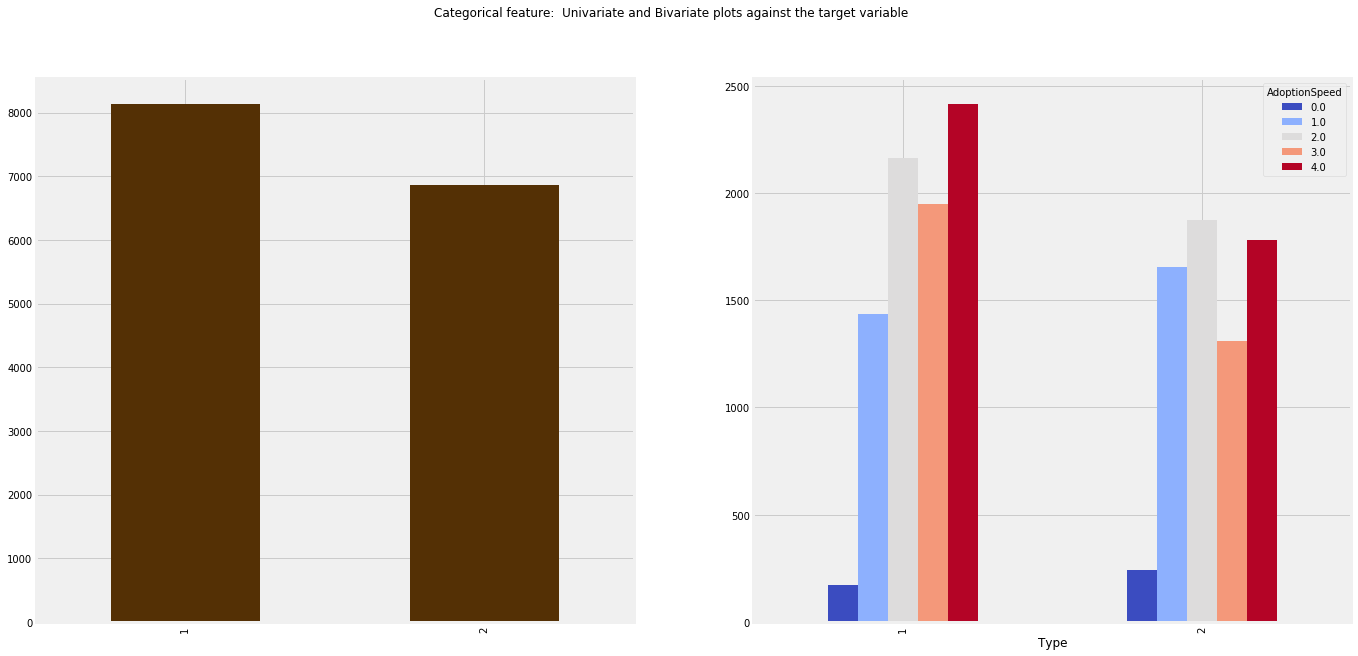

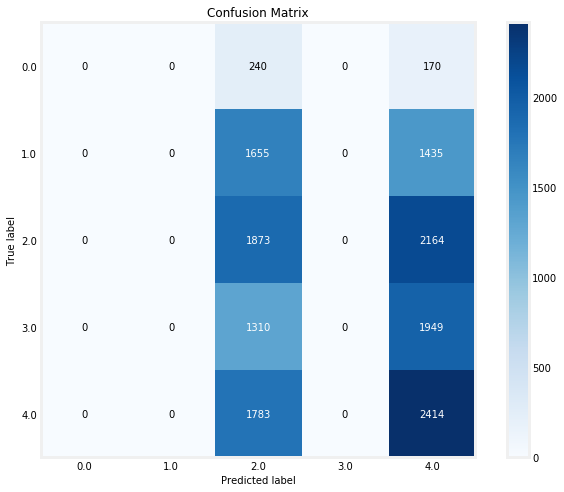

In [25]:
train_df = train_and_test_with_breeds_colors_states[train_and_test_with_breeds_colors_states.dataset_type == "train"]

categorical_univariate_and_bivariate_stats(train_df, feature="Type")
logistic_fit(train_df, feature="Type")

We can see that the rate of dogs in train dataset is higher that in test set. But I don't think the difference is seriuos.

Comparison of rates
From here on I'll compare not only counts of pets in different categories, but also compate adoption speed rates with base ones.

This is how it works:

As we saw earlier the base rate of pets with Adoption speed 0 is 410 / 14993 = 0.027;
Now look at the next graph: there are 6861 cats in train dataset and 240 of them have Adoption Speed 0. So the rate is 240 / 6861 = 0.035;
0.035/0.027 = 1.28, so by splitting out the data to cat vs dog, we can see that cats have a 28% increased chance of adoption speed class 0 over the base rate of adoption;

Top 10 most occurred categories for the categorical feature Vaccinated
2    7227
1    5898
3    1868
Name: Vaccinated, dtype: int64
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       410
         1.0       0.00      0.00      0.00      3090
         2.0       0.29      0.52      0.37      4037
         3.0       0.00      0.00      0.00      3259
         4.0       0.33      0.60      0.42      4197

   micro avg       0.31      0.31      0.31     14993
   macro avg       0.12      0.22      0.16     14993
weighted avg       0.17      0.31      0.22     14993



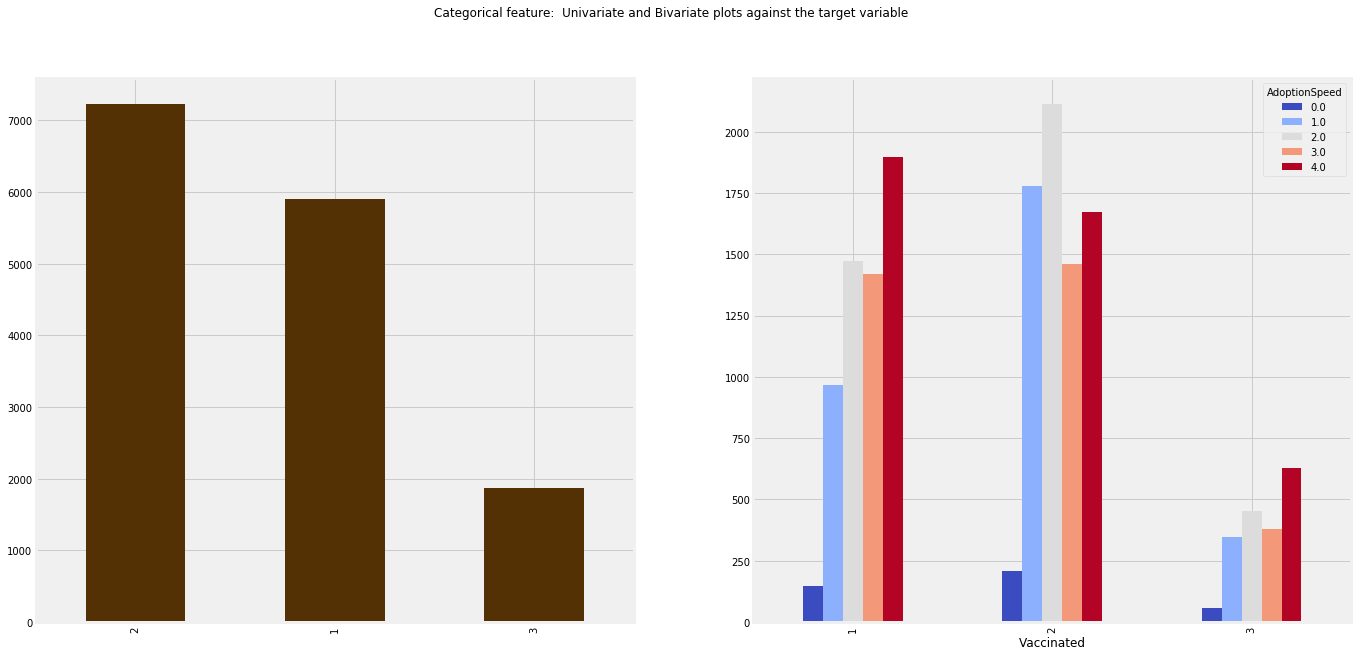

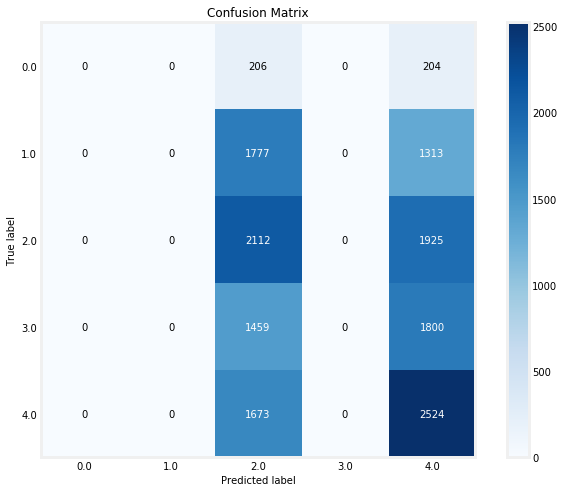

In [26]:
categorical_univariate_and_bivariate_stats(train_df, feature="Vaccinated")
logistic_fit(train_df, feature="Vaccinated")

Top 10 most occurred categories for the categorical feature Sterilized
2    10077
1     3101
3     1815
Name: Sterilized, dtype: int64
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       410
         1.0       0.00      0.00      0.00      3090
         2.0       0.30      0.75      0.43      4037
         3.0       0.00      0.00      0.00      3259
         4.0       0.42      0.49      0.45      4197

   micro avg       0.34      0.34      0.34     14993
   macro avg       0.14      0.25      0.18     14993
weighted avg       0.20      0.34      0.24     14993



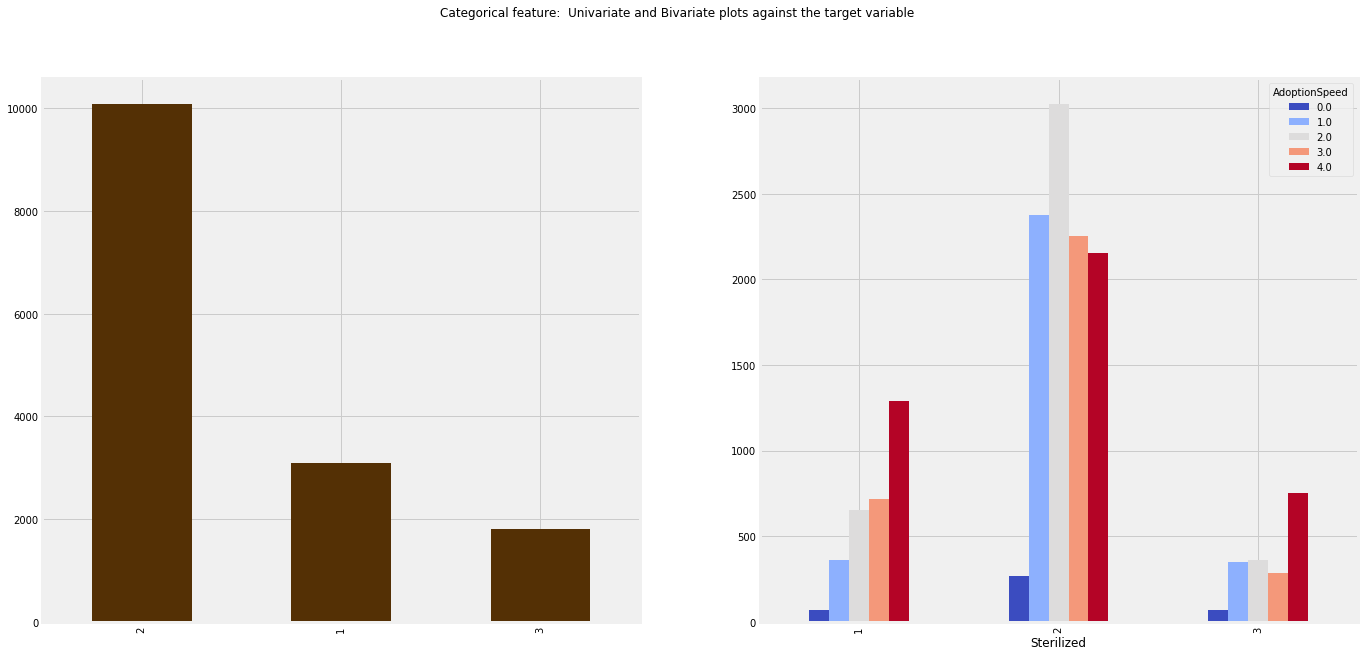

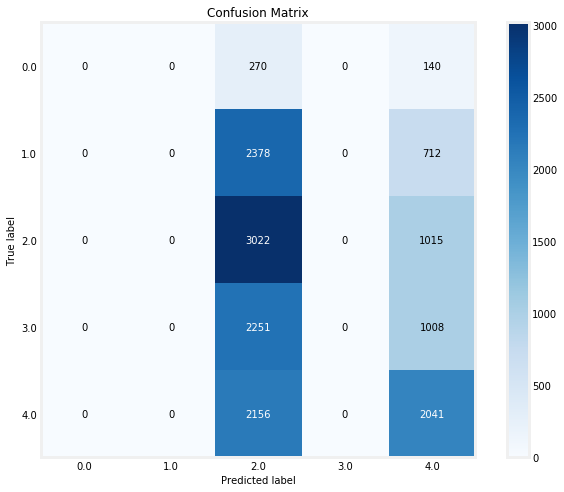

In [27]:
categorical_univariate_and_bivariate_stats(train_df, feature="Sterilized")
logistic_fit(train_df, feature="Sterilized")

Top 10 most occurred categories for the categorical feature Dewormed
1    8397
2    4815
3    1781
Name: Dewormed, dtype: int64
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       410
         1.0       0.00      0.00      0.00      3090
         2.0       0.28      0.33      0.30      4037
         3.0       0.00      0.00      0.00      3259
         4.0       0.29      0.71      0.41      4197

   micro avg       0.29      0.29      0.29     14993
   macro avg       0.11      0.21      0.14     14993
weighted avg       0.16      0.29      0.20     14993



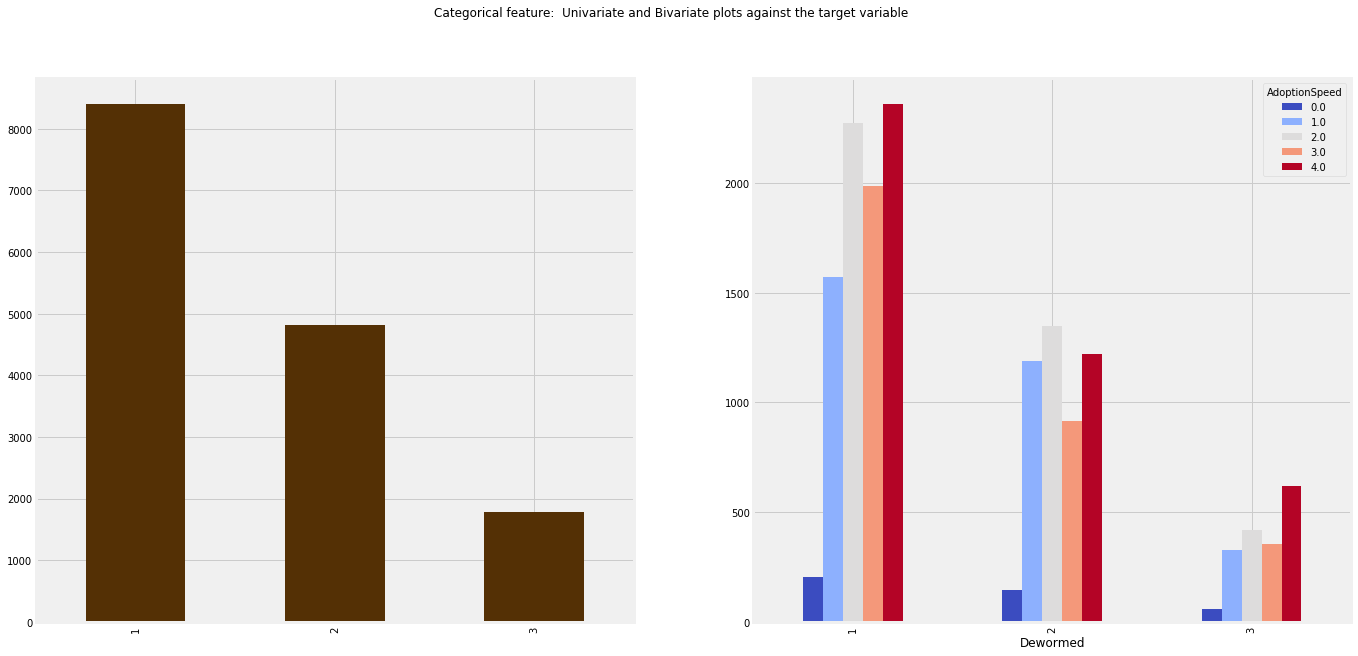

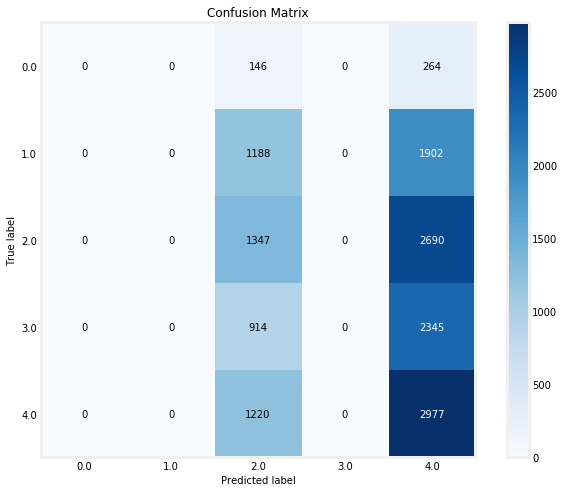

In [28]:
categorical_univariate_and_bivariate_stats(train_df, feature="Dewormed")
logistic_fit(train_df, feature="Dewormed")

Top 10 most occurred categories for the categorical feature State
41326    8714
41401    3845
41327     843
41336     507
41330     420
41332     253
41324     137
41325     110
41335      85
41361      26
Name: State, dtype: int64
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       410
         1.0       0.34      0.01      0.02      3090
         2.0       0.28      0.64      0.39      4037
         3.0       0.00      0.00      0.00      3259
         4.0       0.33      0.45      0.38      4197

   micro avg       0.30      0.30      0.30     14993
   macro avg       0.19      0.22      0.16     14993
weighted avg       0.24      0.30      0.22     14993



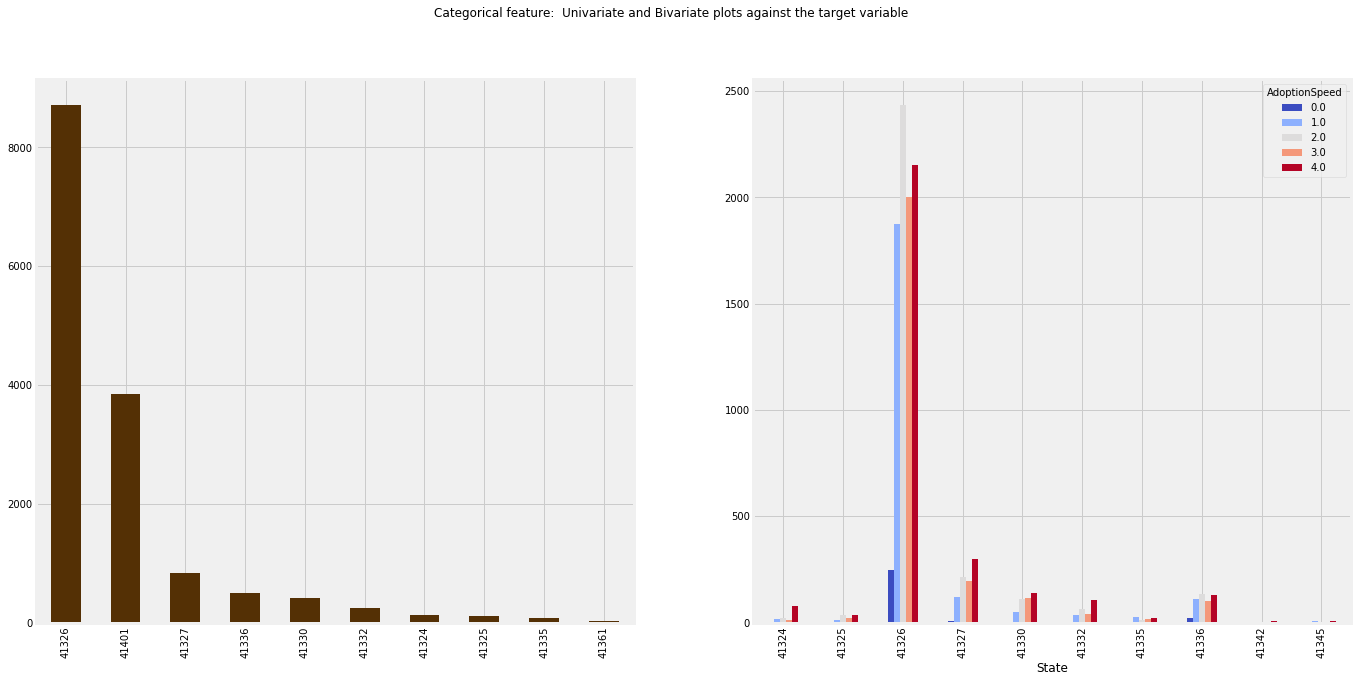

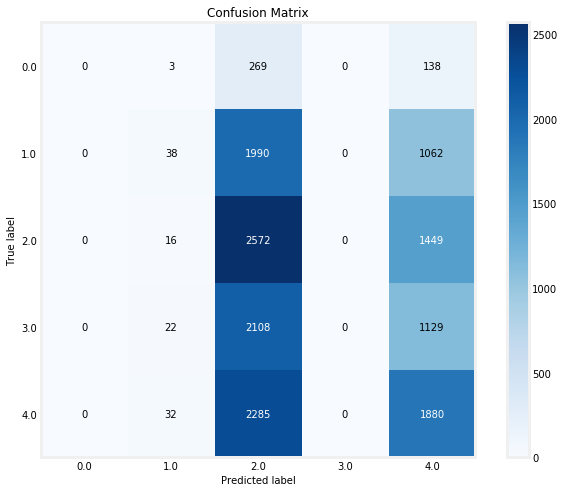

In [29]:
categorical_univariate_and_bivariate_stats(train_df, feature="State")
logistic_fit(train_df, feature="State")

Top 10 most occurred categories for the categorical feature Color1
1    7427
2    3750
3     947
5     884
6     684
7     667
4     634
Name: Color1, dtype: int64
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       410
         1.0       0.00      0.00      0.00      3090
         2.0       0.28      0.22      0.25      4037
         3.0       0.00      0.00      0.00      3259
         4.0       0.29      0.81      0.43      4197

   micro avg       0.29      0.29      0.29     14993
   macro avg       0.11      0.21      0.14     14993
weighted avg       0.16      0.29      0.19     14993



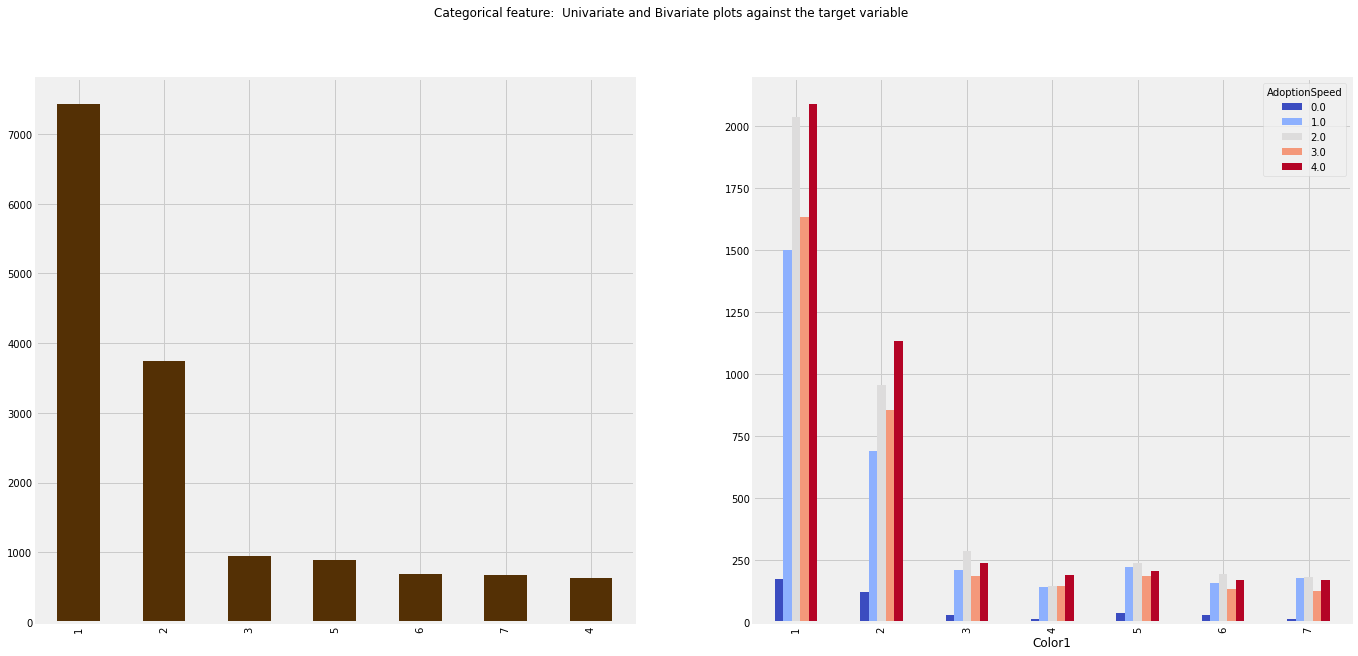

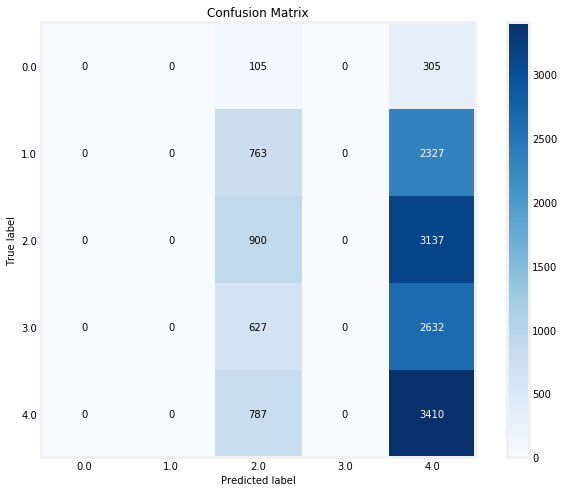

In [30]:
categorical_univariate_and_bivariate_stats(train_df, feature="Color1")
logistic_fit(train_df, feature="Color1")

In [31]:
def numerical_univariate_and_bivariate_plot(df, feature, num_of_bins = 40):
    
    import warnings
    warnings.filterwarnings("ignore", category=FutureWarning)
    warnings.filterwarnings("ignore", category=RuntimeWarning)
    
    train_sample = df
    
    if feature in train_sample.columns:
    
        print("Top 10 Values counts for the numerical feature", feature)
        print(train_sample[feature].value_counts().head(10))
        print("Min value", train_sample[feature].min())
        print("Max value", train_sample[feature].max())
        print("NaN values", train_sample[feature].isnull().sum())
        print("Number of unique values", train_sample[feature].nunique())

        if train[feature].nunique() > 2:
            print("Mean value", train_sample[feature].mean())
            print("Variance value", train_sample[feature].var())

        # for binary features
        if train[feature].nunique() <= 2:

            f, axes = plt.subplots(1, 2, figsize=(21, 10))

            sns.countplot(x=feature, data=train_sample, ax=axes[0])
            sns.countplot(x=feature, hue = "AdoptionSpeed", data=train_sample, ax=axes[1])
            
            f.suptitle("Numerical feature: "+feature+" Univariate and Bivariate plots against the target variable")

        # for numeric features
        else:

            f, axes = plt.subplots(1, 3, figsize=(21, 10))

            sns.distplot(train_sample[feature].dropna(), rug=False, kde=False, ax=axes[0], bins = num_of_bins)

            #sns.violinplot(x="AdoptionSpeed", y = feature, hue="AdoptionSpeed", data=train_sample, ax=axes[1])
            sns.boxplot(x="AdoptionSpeed", y = feature, hue="AdoptionSpeed", data=train_sample, ax=axes[1])

            if feature == "LocaleEnglishNameIdentifier":
                sns.distplot(train_sample[train_sample["AdoptionSpeed"] == 0][feature].dropna().astype("int16"), rug=False, kde=False, ax=axes[2], bins = num_of_bins)
                sns.distplot(train_sample[train_sample["AdoptionSpeed"] == 1][feature].dropna().astype("int16"), rug=False, kde=False, ax=axes[2], bins = num_of_bins)
            else:
                sns.distplot(train_sample[train_sample["AdoptionSpeed"] == 0][feature].dropna(), rug=False, kde=False, ax=axes[2], bins = num_of_bins)
                sns.distplot(train_sample[train_sample["AdoptionSpeed"] == 1][feature].dropna(), rug=False, kde=False, ax=axes[2], bins = num_of_bins)
                sns.distplot(train_sample[train_sample["AdoptionSpeed"] == 2][feature].dropna(), rug=False, kde=False, ax=axes[2], bins = num_of_bins)
                sns.distplot(train_sample[train_sample["AdoptionSpeed"] == 3][feature].dropna(), rug=False, kde=False, ax=axes[2], bins = num_of_bins)
                sns.distplot(train_sample[train_sample["AdoptionSpeed"] == 4][feature].dropna(), rug=False, kde=False, ax=axes[2], bins = num_of_bins)
            
                f.suptitle("Numerical feature: "+feature+" Univariate and Bivariate plots against the target variable")
    else:
        print("This feature has been removed from dataset due to high NaN rate or highly unbalanced values")

Top 10 Values counts for the numerical feature Age
2     3503
1     2304
3     1966
4     1109
12     967
24     651
5      595
6      558
36     417
8      309
Name: Age, dtype: int64
Min value -124
Max value 123
NaN values 0
Number of unique values 106
Mean value 10.04228640032015
Variance value 306.95378804843904
              precision    recall  f1-score   support

         0.0       0.75      0.01      0.01       410
         1.0       0.30      0.02      0.04      3090
         2.0       0.32      0.62      0.42      4037
         3.0       0.35      0.02      0.04      3259
         4.0       0.39      0.63      0.49      4197

   micro avg       0.35      0.35      0.35     14993
   macro avg       0.42      0.26      0.20     14993
weighted avg       0.36      0.35      0.27     14993



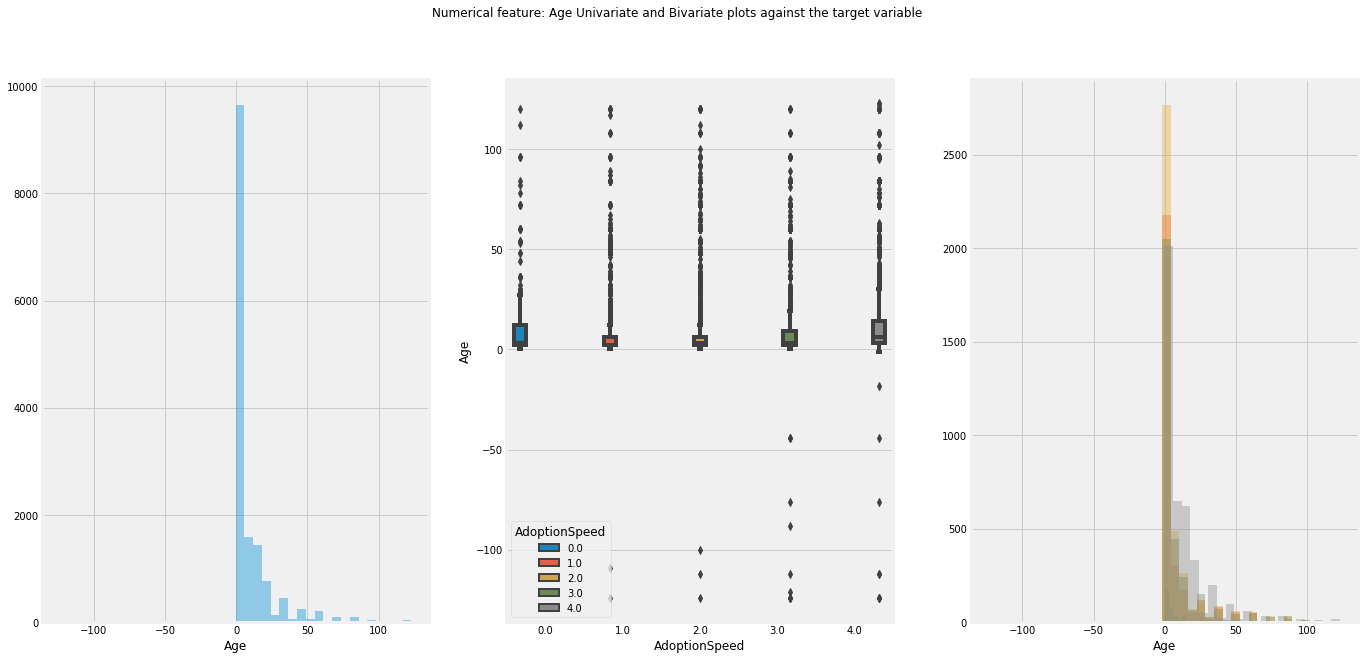

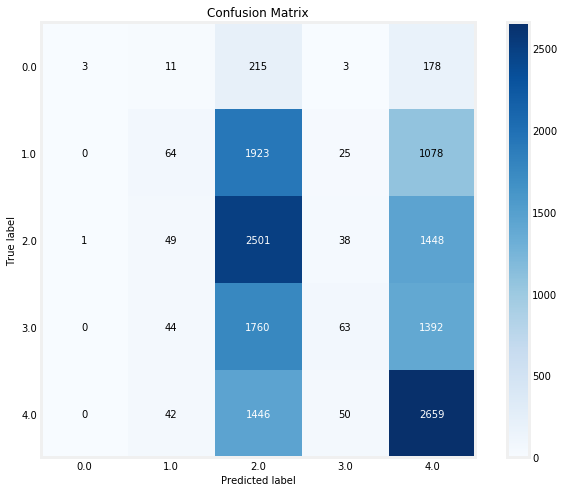

In [32]:
numerical_univariate_and_bivariate_plot(train_df, feature="Age")
logistic_fit(train_df, "Age")

Top 10 Values counts for the numerical feature Fee
0.0      12663
50.0       468
100.0      408
200.0      219
150.0      162
20.0       136
300.0      120
30.0       103
250.0       92
1.0         82
Name: Fee, dtype: int64
Min value 0.0
Max value 3000.0
NaN values 0
Number of unique values 74
Mean value 21.259987994397385
Variance value 6148.841286470966
              precision    recall  f1-score   support

         0.0       0.33      0.00      0.00       410
         1.0       0.41      0.02      0.03      3090
         2.0       0.42      0.03      0.06      4037
         3.0       0.40      0.01      0.02      3259
         4.0       0.28      0.98      0.44      4197

   micro avg       0.29      0.29      0.29     14993
   macro avg       0.37      0.21      0.11     14993
weighted avg       0.37      0.29      0.15     14993



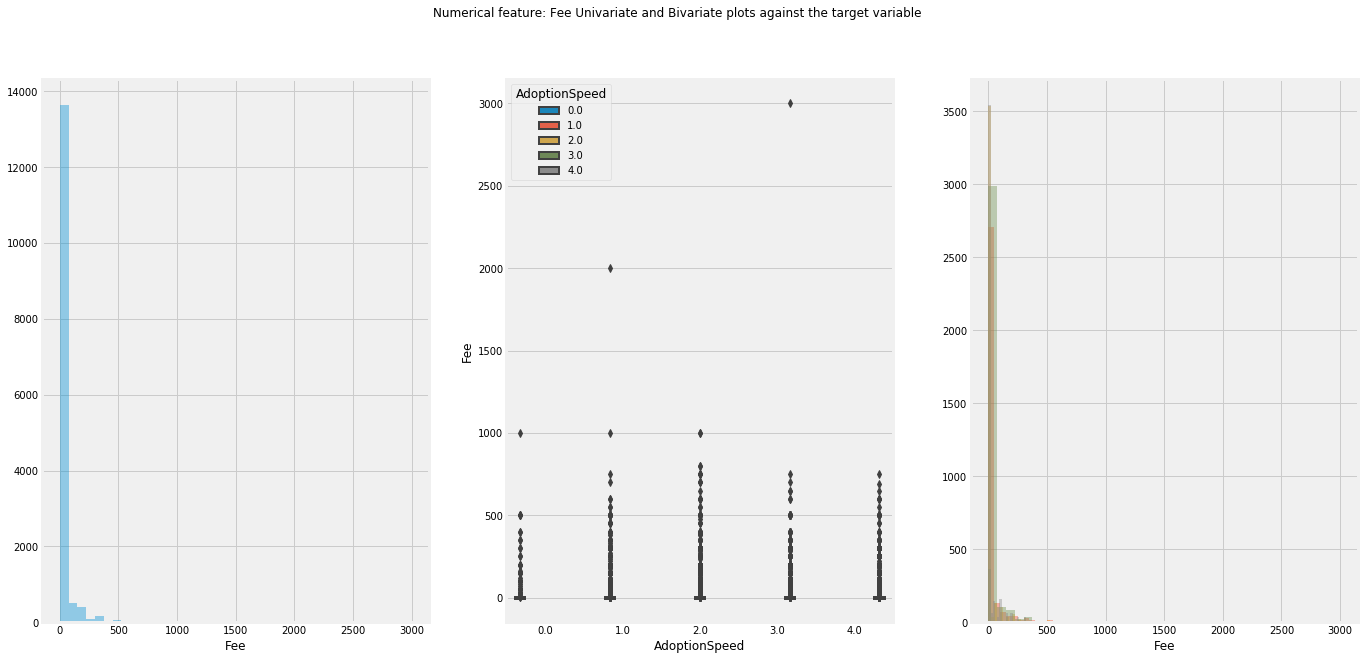

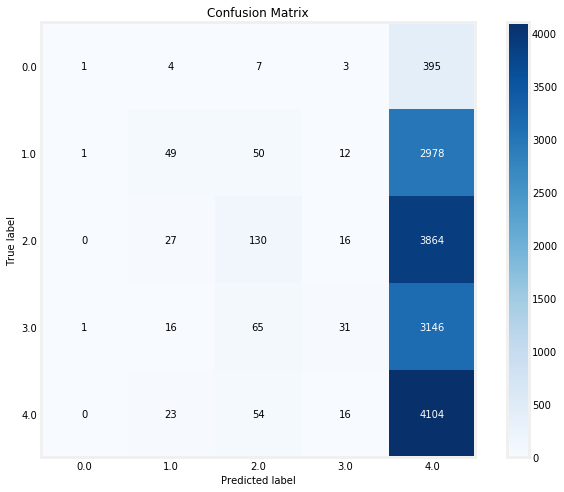

In [33]:
numerical_univariate_and_bivariate_plot(train_df, feature="Fee")
logistic_fit(train_df, "Fee")

Top 10 Values counts for the numerical feature FurLength
1    8808
2    5361
3     824
Name: FurLength, dtype: int64
Min value 1
Max value 3
NaN values 0
Number of unique values 3
Mean value 1.467484826252251
Variance value 0.3588846620062682
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       410
         1.0       0.31      0.08      0.13      3090
         2.0       0.00      0.00      0.00      4037
         3.0       0.00      0.00      0.00      3259
         4.0       0.29      0.97      0.44      4197

   micro avg       0.29      0.29      0.29     14993
   macro avg       0.12      0.21      0.11     14993
weighted avg       0.14      0.29      0.15     14993



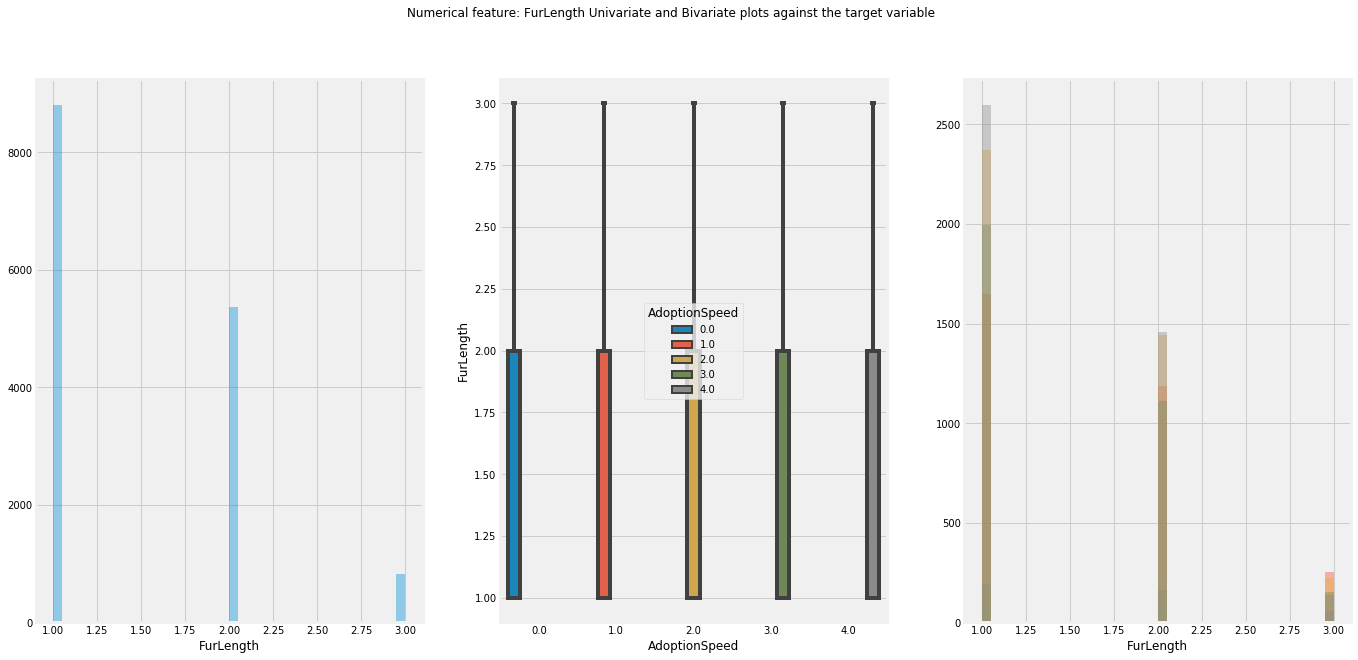

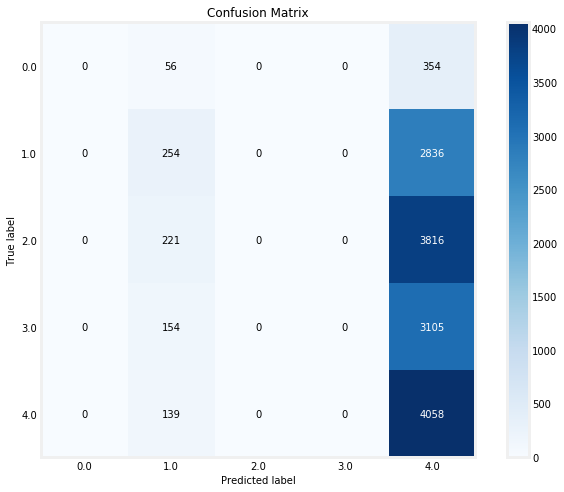

In [34]:
numerical_univariate_and_bivariate_plot(train_df, feature="FurLength")
logistic_fit(train_df, "FurLength")

Top 10 Values counts for the numerical feature MaturitySize
2.0    10305
1.0     3395
3.0     1260
4.0       33
Name: MaturitySize, dtype: int64
Min value 1.0
Max value 4.0
NaN values 0
Number of unique values 4
Mean value 1.862
Variance value 0.3
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       410
         1.0       0.00      0.00      0.00      3090
         2.0       0.26      0.22      0.24      4037
         3.0       0.00      0.00      0.00      3259
         4.0       0.29      0.79      0.42      4197

   micro avg       0.28      0.28      0.28     14993
   macro avg       0.11      0.20      0.13     14993
weighted avg       0.15      0.28      0.18     14993



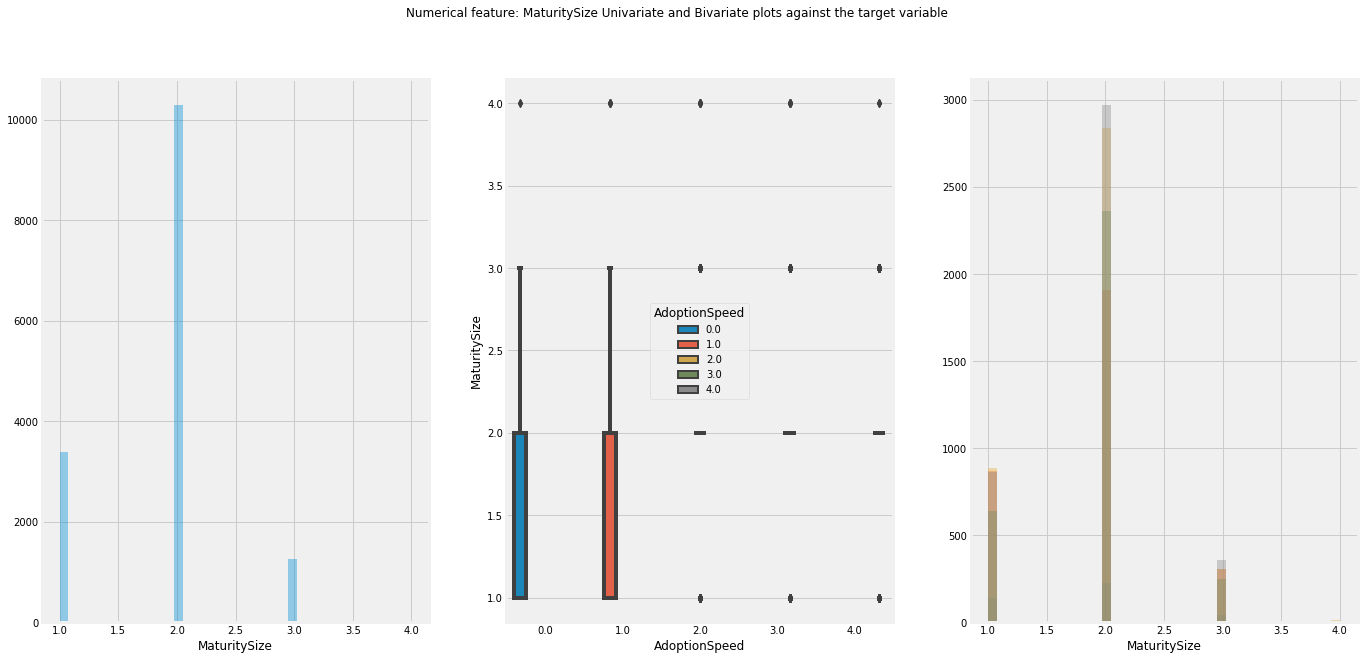

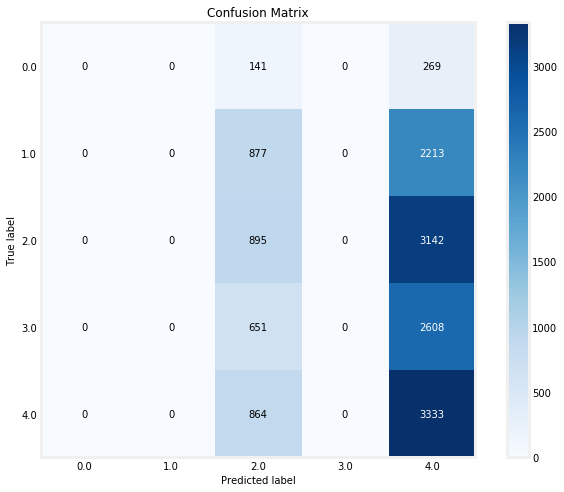

In [35]:
numerical_univariate_and_bivariate_plot(train_df, feature="MaturitySize")
logistic_fit(train_df, "MaturitySize")

Top 10 Values counts for the numerical feature PhotoAmt
1    3075
2    2518
3    2511
5    2147
4    1881
6     621
7     432
0     341
8     314
9     231
Name: PhotoAmt, dtype: int64
Min value 0
Max value 30
NaN values 0
Number of unique values 31
Mean value 3.889214966984593
Variance value 12.16482030817512
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       410
         1.0       0.33      0.00      0.01      3090
         2.0       0.29      0.34      0.31      4037
         3.0       0.33      0.18      0.24      3259
         4.0       0.32      0.64      0.43      4197

   micro avg       0.31      0.31      0.31     14993
   macro avg       0.26      0.23      0.20     14993
weighted avg       0.31      0.31      0.26     14993



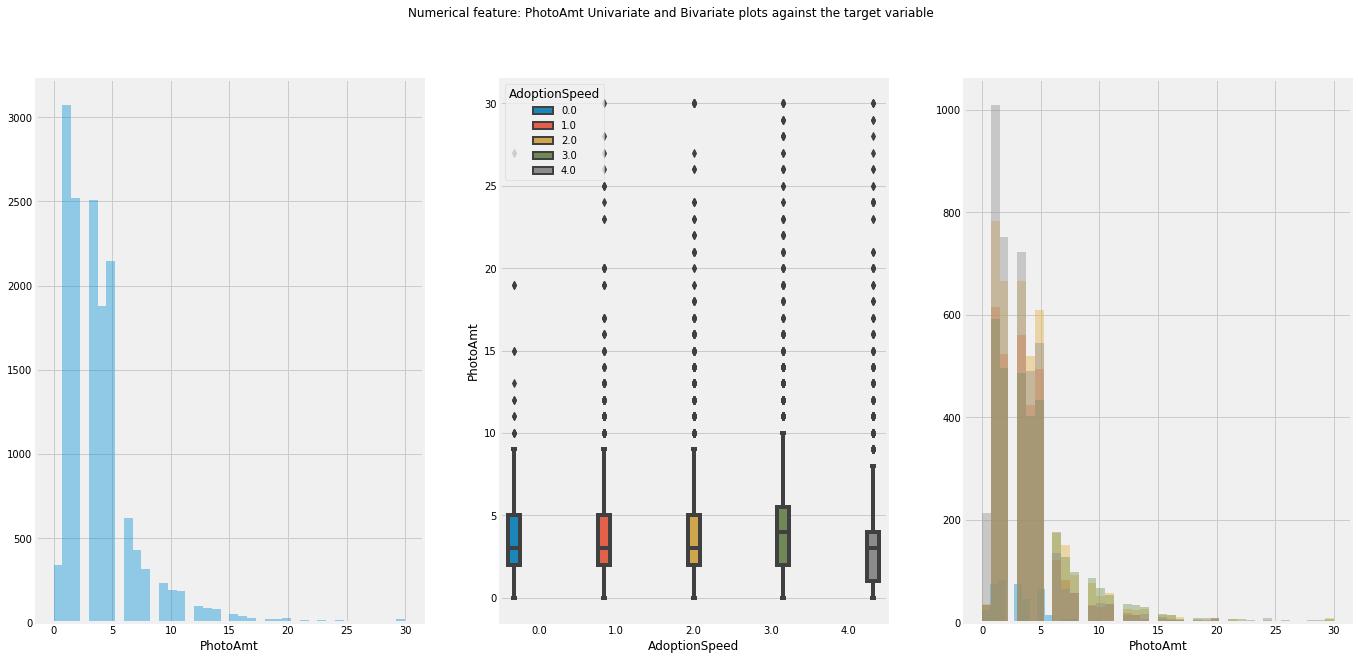

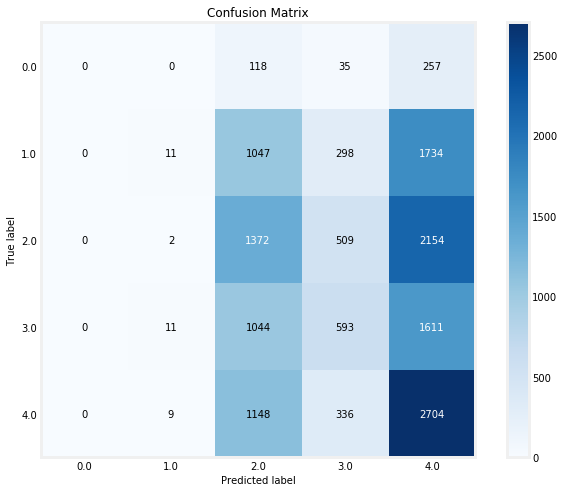

In [36]:
numerical_univariate_and_bivariate_plot(train_df, feature="PhotoAmt")
logistic_fit(train_df, "PhotoAmt")

Top 10 Values counts for the numerical feature Quantity
1     11565
2      1422
3       726
4       531
5       333
6       185
7        84
8        52
9        33
10       19
Name: Quantity, dtype: int64
Min value 1
Max value 20
NaN values 0
Number of unique values 19
Mean value 1.5760688321216567
Variance value 2.1681892674069676
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       410
         1.0       0.00      0.00      0.00      3090
         2.0       0.27      0.79      0.41      4037
         3.0       0.33      0.00      0.01      3259
         4.0       0.33      0.26      0.29      4197

   micro avg       0.29      0.29      0.29     14993
   macro avg       0.19      0.21      0.14     14993
weighted avg       0.24      0.29      0.19     14993



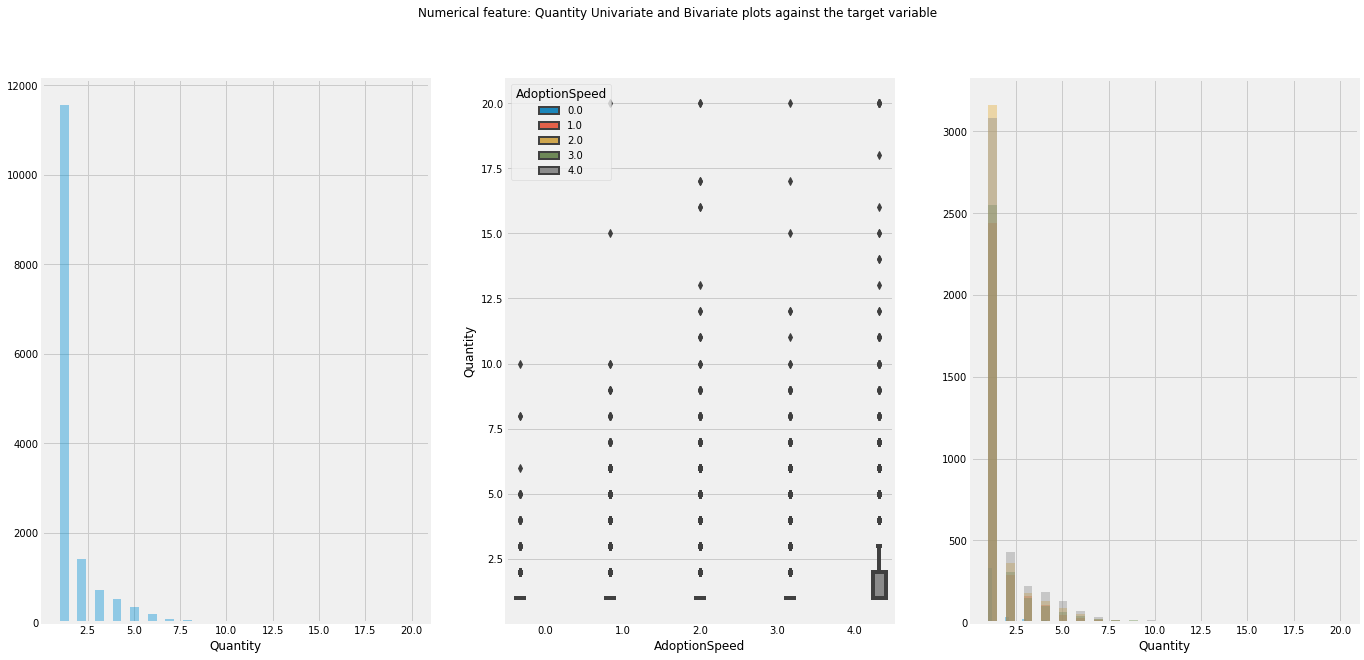

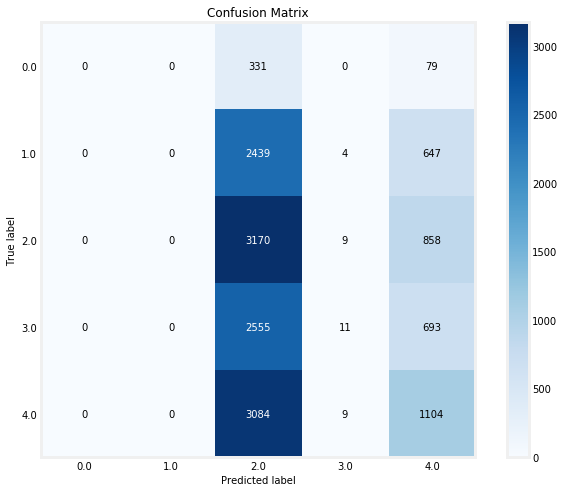

In [37]:
numerical_univariate_and_bivariate_plot(train_df, feature="Quantity")
logistic_fit(train_df, "Quantity")

Top 10 Values counts for the numerical feature VideoAmt
0    14419
1      417
2       92
3       36
4       15
5        7
6        4
8        2
7        1
Name: VideoAmt, dtype: int64
Min value 0
Max value 8
NaN values 0
Number of unique values 9
Mean value 0.05675982124991663
Variance value 0.11984374280391684
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       410
         1.0       0.00      0.00      0.00      3090
         2.0       0.32      0.04      0.08      4037
         3.0       0.44      0.00      0.00      3259
         4.0       0.28      0.97      0.44      4197

   micro avg       0.28      0.28      0.28     14993
   macro avg       0.21      0.20      0.10     14993
weighted avg       0.26      0.28      0.14     14993



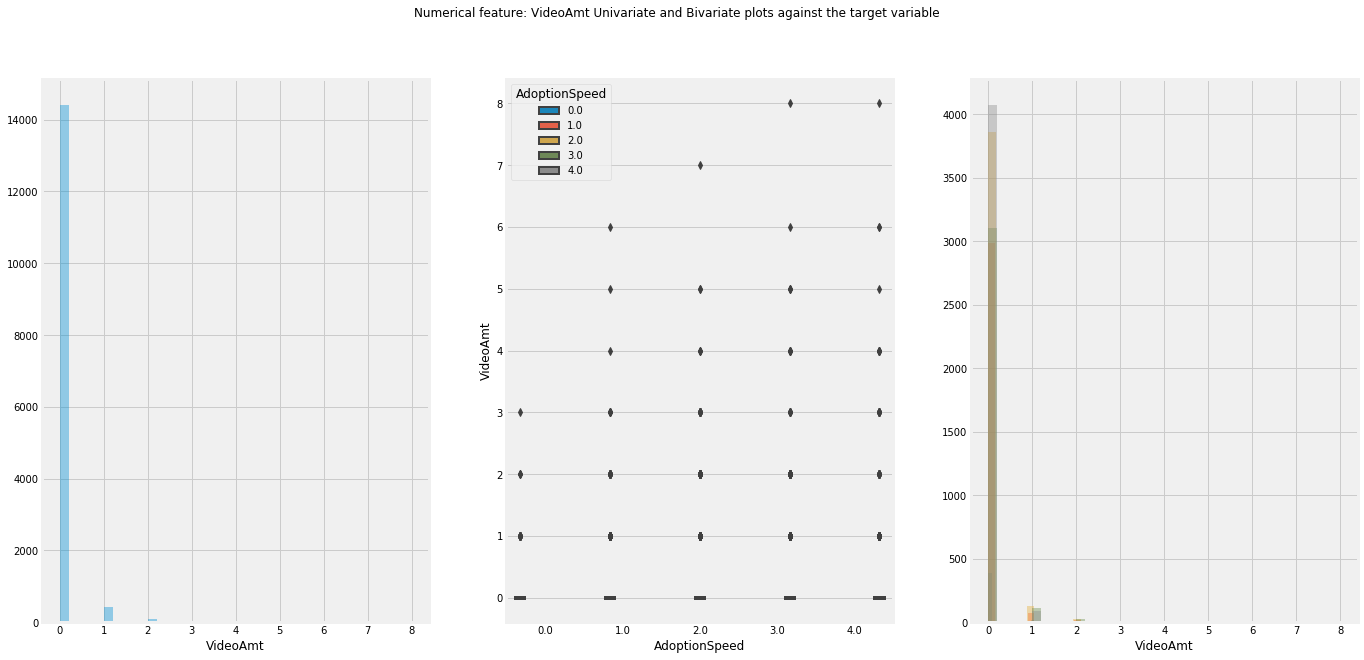

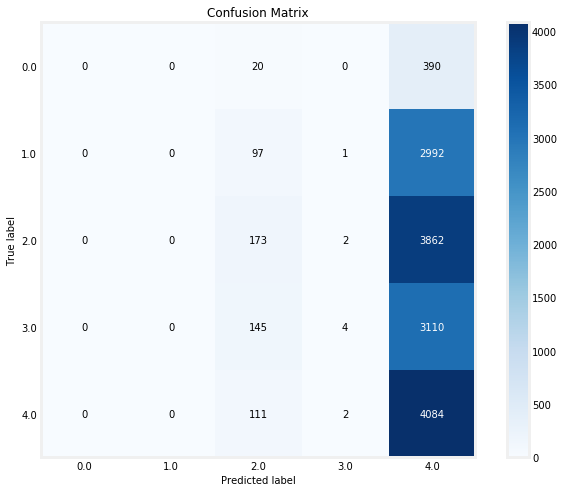

In [38]:
numerical_univariate_and_bivariate_plot(train_df, feature="VideoAmt")
logistic_fit(train_df, "VideoAmt")

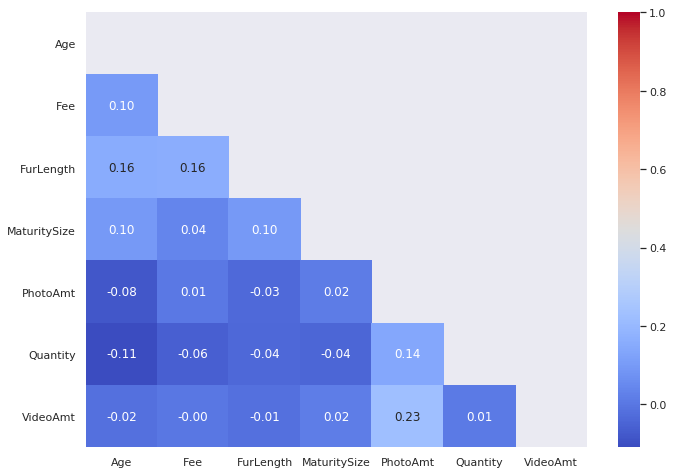

In [39]:
sns.set(rc={'figure.figsize':(10, 8)})

# Compute the correlation matrix
corr = train_df[numerical_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm')

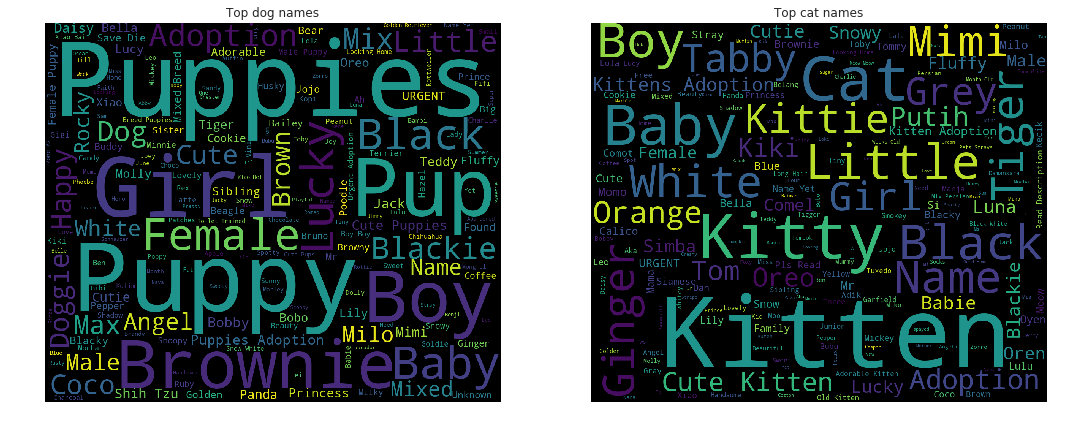

In [40]:
# I want to thank https://www.kaggle.com/artgor/exploration-of-data-step-by-step/notebook for the following snippet:

fig, ax = plt.subplots(figsize = (16, 12))
plt.subplot(1, 2, 1)
text_dog = ' '.join(train_and_test.loc[train_and_test['Type'] == '1', 'Name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='Black',
                      width=1200, height=1000).generate(text_dog)
plt.imshow(wordcloud)
plt.title('Top dog names')
plt.axis("off")

plt.subplot(1, 2, 2)
text_cat = ' '.join(train_and_test.loc[train_and_test['Type'] == '2', 'Name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='Black',
                      width=1200, height=1000).generate(text_cat)
plt.imshow(wordcloud)
plt.title('Top cat names')
plt.axis("off")

plt.show()

## XGBoost ML Modeling

### Preparing train and test set before ML modeling

In [41]:
train_df = train_and_test_with_breeds_colors_states[train_and_test_with_breeds_colors_states.dataset_type == "train"]
test_df = train_and_test_with_breeds_colors_states[train_and_test_with_breeds_colors_states.dataset_type == "test"]

In [42]:
train_df.columns

Index(['AdoptionSpeed', 'Age', 'Breed1', 'Breed2', 'Color1', 'Color2',
       'Color3', 'Description', 'Dewormed', 'Fee', 'FurLength', 'Gender',
       'Health', 'MaturitySize', 'Name', 'PetID', 'PhotoAmt', 'Quantity',
       'RescuerID', 'State', 'Sterilized', 'Type', 'Vaccinated', 'VideoAmt',
       'dataset_type', 'BreedName_1', 'BreedName_2', 'ColorName_1',
       'ColorName_2', 'ColorName_3', 'StateName'],
      dtype='object')

In [43]:
test_df.columns

Index(['AdoptionSpeed', 'Age', 'Breed1', 'Breed2', 'Color1', 'Color2',
       'Color3', 'Description', 'Dewormed', 'Fee', 'FurLength', 'Gender',
       'Health', 'MaturitySize', 'Name', 'PetID', 'PhotoAmt', 'Quantity',
       'RescuerID', 'State', 'Sterilized', 'Type', 'Vaccinated', 'VideoAmt',
       'dataset_type', 'BreedName_1', 'BreedName_2', 'ColorName_1',
       'ColorName_2', 'ColorName_3', 'StateName'],
      dtype='object')

In [44]:
# A big thank you to https://www.kaggle.com/econdata/petfinder-lgbm/notebook for his intuition

%time
import json

train_id = train['PetID']
test_id = test['PetID']
doc_sent_mag = []
doc_sent_score = []
nf_count = 0
for pet in train_id:
    try:
        with open('../input/train_sentiment/' + pet + '.json', 'r') as f:
            sentiment = json.load(f)
        doc_sent_mag.append(sentiment['documentSentiment']['magnitude'])
        doc_sent_score.append(sentiment['documentSentiment']['score'])
    except FileNotFoundError:
        nf_count += 1
        doc_sent_mag.append(-1)
        doc_sent_score.append(-1)

train_df['doc_sent_mag'] = doc_sent_mag
train_df['doc_sent_score'] = doc_sent_score

doc_sent_mag = []
doc_sent_score = []
nf_count = 0
for pet in test_id:
    try:
        with open('../input/test_sentiment/' + pet + '.json', 'r') as f:
            sentiment = json.load(f)
        doc_sent_mag.append(sentiment['documentSentiment']['magnitude'])
        doc_sent_score.append(sentiment['documentSentiment']['score'])
    except FileNotFoundError:
        nf_count += 1
        doc_sent_mag.append(-1)
        doc_sent_score.append(-1)

test_df['doc_sent_mag'] = doc_sent_mag
test_df['doc_sent_score'] = doc_sent_score

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.11 µs


### Feature Engineering with the textual Data

In [45]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

train_desc = train.Description.fillna("none").values
test_desc = test.Description.fillna("none").values


max_train_len = [len(x) for x in train_desc]

max_test_len = [len(x) for x in test_desc]


tfv = TfidfVectorizer(min_df=3,  max_features=max([max(max_train_len), max(max_test_len)]),
        strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}',
        ngram_range=(1, 3), use_idf=1, smooth_idf=1, sublinear_tf=1,
        stop_words = 'english')
    
# Fit TFIDF
tfv.fit(list(train_desc))
X =  tfv.transform(train_desc)
X_test = tfv.transform(test_desc)

components = 480
svd = TruncatedSVD(n_components=components)
svd.fit(X)
print(svd.explained_variance_ratio_.sum())
print(svd.explained_variance_ratio_)
X = svd.transform(X)
X = pd.DataFrame(X, columns=['svd_{}'.format(i) for i in range(components)])
train_df = pd.concat((train_df, X), axis=1)
X_test = svd.transform(X_test)
X_test = pd.DataFrame(X_test, columns=['svd_{}'.format(i) for i in range(components)])

test_df.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

test_df = pd.concat([test_df, X_test], axis=1)

0.49636104625159483
[0.00323092 0.01470523 0.00952515 0.00530316 0.00489895 0.00459003
 0.00453009 0.00443306 0.00404917 0.00396203 0.0038479  0.00373375
 0.0035528  0.00342693 0.00333046 0.00324033 0.00309492 0.00306167
 0.00292417 0.00289867 0.00289383 0.00285771 0.00276    0.00271359
 0.0026738  0.00264597 0.00257296 0.00252921 0.00241481 0.00239374
 0.00237312 0.00231877 0.00225405 0.00220681 0.0021853  0.00215425
 0.00210698 0.0020892  0.00205536 0.00202709 0.00201087 0.00198076
 0.00197123 0.00190805 0.0019064  0.00189649 0.00187891 0.00184989
 0.00184266 0.00183666 0.0018057  0.00178045 0.00176387 0.00174664
 0.00174441 0.00172518 0.00171971 0.00170755 0.00167706 0.0016652
 0.001655   0.00164383 0.00162781 0.00161108 0.00159829 0.00159001
 0.00156898 0.00155729 0.00155242 0.00153672 0.00153112 0.00151224
 0.00150838 0.00148769 0.00146166 0.00145669 0.00144029 0.00143717
 0.00142659 0.00141401 0.00140206 0.00139075 0.00138542 0.00137087
 0.00136839 0.0013604  0.00135172 0.0013413

### Feature Engineering with the matadata

In [46]:
# I want to thank https://www.kaggle.com/econdata/petfinder-lgbm/notebook for his intuition

%time
vertex_xs = []
vertex_ys = []
bounding_confidences = []
bounding_importance_fracs = []
dominant_blues = []
dominant_greens = []
dominant_reds = []
dominant_pixel_fracs = []
dominant_scores = []
label_descriptions = []
label_scores = []
nf_count = 0
nl_count = 0
for pet in train_id:
    try:
        with open('../input/train_metadata/' + pet + '-1.json', 'r') as f:
            data = json.load(f)
        vertex_x = data['cropHintsAnnotation']['cropHints'][0]['boundingPoly']['vertices'][2]['x']
        vertex_xs.append(vertex_x)
        vertex_y = data['cropHintsAnnotation']['cropHints'][0]['boundingPoly']['vertices'][2]['y']
        vertex_ys.append(vertex_y)
        bounding_confidence = data['cropHintsAnnotation']['cropHints'][0]['confidence']
        bounding_confidences.append(bounding_confidence)
        bounding_importance_frac = data['cropHintsAnnotation']['cropHints'][0].get('importanceFraction', -1)
        bounding_importance_fracs.append(bounding_importance_frac)
        dominant_blue = data['imagePropertiesAnnotation']['dominantColors']['colors'][0]['color']['blue']
        dominant_blues.append(dominant_blue)
        dominant_green = data['imagePropertiesAnnotation']['dominantColors']['colors'][0]['color']['green']
        dominant_greens.append(dominant_green)
        dominant_red = data['imagePropertiesAnnotation']['dominantColors']['colors'][0]['color']['red']
        dominant_reds.append(dominant_red)
        dominant_pixel_frac = data['imagePropertiesAnnotation']['dominantColors']['colors'][0]['pixelFraction']
        dominant_pixel_fracs.append(dominant_pixel_frac)
        dominant_score = data['imagePropertiesAnnotation']['dominantColors']['colors'][0]['score']
        dominant_scores.append(dominant_score)
        if data.get('labelAnnotations'):
            label_description = data['labelAnnotations'][0]['description']
            label_descriptions.append(label_description)
            label_score = data['labelAnnotations'][0]['score']
            label_scores.append(label_score)
        else:
            nl_count += 1
            label_descriptions.append('nothing')
            label_scores.append(-1)
    except FileNotFoundError:
        nf_count += 1
        vertex_xs.append(-1)
        vertex_ys.append(-1)
        bounding_confidences.append(-1)
        bounding_importance_fracs.append(-1)
        dominant_blues.append(-1)
        dominant_greens.append(-1)
        dominant_reds.append(-1)
        dominant_pixel_fracs.append(-1)
        dominant_scores.append(-1)
        label_descriptions.append('nothing')
        label_scores.append(-1)

print(nf_count)
print(nl_count)
train_df.loc[:, 'vertex_x'] = vertex_xs
train_df.loc[:, 'vertex_y'] = vertex_ys
train_df.loc[:, 'bounding_confidence'] = bounding_confidences
train_df.loc[:, 'bounding_importance'] = bounding_importance_fracs
train_df.loc[:, 'dominant_blue'] = dominant_blues
train_df.loc[:, 'dominant_green'] = dominant_greens
train_df.loc[:, 'dominant_red'] = dominant_reds
train_df.loc[:, 'dominant_pixel_frac'] = dominant_pixel_fracs
train_df.loc[:, 'dominant_score'] = dominant_scores
train_df.loc[:, 'label_description'] = label_descriptions
train_df.loc[:, 'label_score'] = label_scores


vertex_xs = []
vertex_ys = []
bounding_confidences = []
bounding_importance_fracs = []
dominant_blues = []
dominant_greens = []
dominant_reds = []
dominant_pixel_fracs = []
dominant_scores = []
label_descriptions = []
label_scores = []
nf_count = 0
nl_count = 0
for pet in test_id:
    try:
        with open('../input/test_metadata/' + pet + '-1.json', 'r') as f:
            data = json.load(f)
        vertex_x = data['cropHintsAnnotation']['cropHints'][0]['boundingPoly']['vertices'][2]['x']
        vertex_xs.append(vertex_x)
        vertex_y = data['cropHintsAnnotation']['cropHints'][0]['boundingPoly']['vertices'][2]['y']
        vertex_ys.append(vertex_y)
        bounding_confidence = data['cropHintsAnnotation']['cropHints'][0]['confidence']
        bounding_confidences.append(bounding_confidence)
        bounding_importance_frac = data['cropHintsAnnotation']['cropHints'][0].get('importanceFraction', -1)
        bounding_importance_fracs.append(bounding_importance_frac)
        dominant_blue = data['imagePropertiesAnnotation']['dominantColors']['colors'][0]['color']['blue']
        dominant_blues.append(dominant_blue)
        dominant_green = data['imagePropertiesAnnotation']['dominantColors']['colors'][0]['color']['green']
        dominant_greens.append(dominant_green)
        dominant_red = data['imagePropertiesAnnotation']['dominantColors']['colors'][0]['color']['red']
        dominant_reds.append(dominant_red)
        dominant_pixel_frac = data['imagePropertiesAnnotation']['dominantColors']['colors'][0]['pixelFraction']
        dominant_pixel_fracs.append(dominant_pixel_frac)
        dominant_score = data['imagePropertiesAnnotation']['dominantColors']['colors'][0]['score']
        dominant_scores.append(dominant_score)
        if data.get('labelAnnotations'):
            label_description = data['labelAnnotations'][0]['description']
            label_descriptions.append(label_description)
            label_score = data['labelAnnotations'][0]['score']
            label_scores.append(label_score)
        else:
            nl_count += 1
            label_descriptions.append('nothing')
            label_scores.append(-1)
    except FileNotFoundError:
        nf_count += 1
        vertex_xs.append(-1)
        vertex_ys.append(-1)
        bounding_confidences.append(-1)
        bounding_importance_fracs.append(-1)
        dominant_blues.append(-1)
        dominant_greens.append(-1)
        dominant_reds.append(-1)
        dominant_pixel_fracs.append(-1)
        dominant_scores.append(-1)
        label_descriptions.append('nothing')
        label_scores.append(-1)

print(nf_count)
test_df.loc[:, 'vertex_x'] = vertex_xs
test_df.loc[:, 'vertex_y'] = vertex_ys
test_df.loc[:, 'bounding_confidence'] = bounding_confidences
test_df.loc[:, 'bounding_importance'] = bounding_importance_fracs
test_df.loc[:, 'dominant_blue'] = dominant_blues
test_df.loc[:, 'dominant_green'] = dominant_greens
test_df.loc[:, 'dominant_red'] = dominant_reds
test_df.loc[:, 'dominant_pixel_frac'] = dominant_pixel_fracs
test_df.loc[:, 'dominant_score'] = dominant_scores
test_df.loc[:, 'label_description'] = label_descriptions
test_df.loc[:, 'label_score'] = label_scores

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.63 µs
341
2
128


### Small Feature Engineering

In [47]:
train_df["HasName"] = np.where(train_df["Name"].isnull(), 1, 0)
train_df["HasDescription"] = np.where(train_df["Description"].isnull(), 1, 0)

test_df["HasName"] = np.where(test_df["Name"].isnull(), 1, 0)
test_df["HasDescription"] = np.where(test_df["Description"].isnull(), 1, 0)

train_df.drop(["Name", "PetID", "RescuerID", "dataset_type", "BreedName_1", "BreedName_2", "ColorName_1", "ColorName_2", "ColorName_3",
                    "StateName", "Description"], axis="columns", inplace = True)

test_df.drop(["Name", "PetID", "RescuerID", "dataset_type", "BreedName_1", "BreedName_2", "ColorName_1", "ColorName_2", "ColorName_3",
                    "StateName", "Description"], axis="columns", inplace = True)

### Concatenate train and test sets before label encoding

In [48]:
train_shape = train_df.shape
test_shape = test_df.shape

train_and_test = pd.concat([train_df, test_df], axis="rows", sort=False)


In [49]:
train_and_test.head()

,AdoptionSpeed,Age,Breed1,Breed2,Color1,Color2,Color3,Dewormed,Fee,FurLength,Gender,Health,MaturitySize,PhotoAmt,Quantity,State,Sterilized,Type,Vaccinated,VideoAmt,doc_sent_mag,doc_sent_score,svd_0,svd_1,svd_2,svd_3,svd_4,svd_5,svd_6,svd_7,svd_8,svd_9,svd_10,svd_11,svd_12,svd_13,svd_14,svd_15,svd_16,svd_17,...,svd_453,svd_454,svd_455,svd_456,svd_457,svd_458,svd_459,svd_460,svd_461,svd_462,svd_463,svd_464,svd_465,svd_466,svd_467,svd_468,svd_469,svd_470,svd_471,svd_472,svd_473,svd_474,svd_475,svd_476,svd_477,svd_478,svd_479,vertex_x,vertex_y,bounding_confidence,bounding_importance,dominant_blue,dominant_green,dominant_red,dominant_pixel_frac,dominant_score,label_description,label_score,HasName,HasDescription
0,2.0,3,299,0,1,7,0,2,100.0,1,1,1,1.0,1,1,41326,2,2,2,0,2.4,0.3,0.169623,-0.064911,-0.059200,0.031818,-0.003340,-0.037184,-0.001475,0.003370,-0.017731,-0.030492,-0.028007,0.009908,-0.012531,-0.039964,-0.044066,0.027970,0.006812,-0.023011,...,0.014232,-0.025806,0.022056,0.006247,0.012160,-0.011629,0.025961,0.017854,0.021803,0.013405,0.006979,0.015164,0.013801,-0.005080,0.006647,0.016414,-0.003185,-0.005914,0.020561,0.019448,0.016321,0.055331,0.005785,0.011275,0.012019,-0.035499,-0.006251,359,479,0.8,1.00,21,20,25,0.393910,0.302789,cat,0.990786,0,0
1,0.0,1,265,0,1,2,0,3,0.0,2,1,1,2.0,2,1,41401,3,2,3,0,0.7,-0.2,0.103547,-0.044431,-0.015137,-0.043039,-0.002615,-0.047607,0.029204,-0.050283,-0.028679,0.014608,0.029109,-0.000285,0.004715,-0.011805,0.006274,-0.000490,-0.029126,-0.019591,...,-0.015651,0.003783,0.015907,0.004175,0.035518,-0.001025,0.037066,0.005251,0.015927,0.012595,-0.018000,0.042562,-0.016229,-0.009022,-0.014570,-0.000547,0.015595,-0.002594,0.001929,0.012137,0.020523,0.020264,-0.003458,-0.003548,-0.035580,0.011554,-0.010417,398,376,0.8,1.00,17,24,19,0.261856,0.348178,cat,0.981269,0,0
2,3.0,1,307,0,2,7,0,1,0.0,2,1,1,2.0,7,1,41326,2,1,1,0,3.7,0.2,0.159982,-0.068921,0.155494,0.000042,0.090431,0.153014,-0.192176,-0.095556,-0.175381,0.138604,0.041580,0.058666,-0.184350,0.052567,0.006315,-0.064024,-0.108953,0.001511,...,0.000790,0.014532,0.008059,-0.021728,0.041904,-0.000021,-0.018543,-0.005790,0.021441,-0.003304,-0.025702,-0.022738,0.005111,0.032690,0.035943,-0.007612,0.030371,0.004551,-0.000898,0.003919,-0.013008,-0.009732,0.011658,-0.022239,-0.045444,0.015292,0.023882,299,399,0.8,1.00,51,55,61,0.055064,0.333318,dog,0.960457,0,0
3,2.0,4,307,0,1,2,0,1,150.0,1,2,1,2.0,8,1,41401,2,1,1,0,0.9,0.9,0.123487,-0.046360,-0.008436,-0.139441,0.001929,0.107855,-0.048322,0.020784,0.045660,0.027547,0.005784,-0.075599,0.080280,-0.061566,0.091225,-0.088433,0.043199,0.054704,...,-0.005718,0.032685,-0.003107,0.005039,-0.016434,-0.012001,-0.000148,0.024195,-0.026233,0.006706,-0.005598,0.009173,-0.007664,0.007043,0.013517,0.008303,-0.004793,0.020171,-0.001352,-0.001341,-0.000849,0.004366,0.027945,-0.004063,-0.003096,-0.011455,0.011737,399,299,0.8,1.00,47,50,54,0.127818,0.136823,dog,0.978698,0,0
4,2.0,1,307,0,1,0,0,2,0.0,1,1,1,2.0,3,1,41326,2,1,2,0,3.7,0.6,0.217621,0.007225,-0.004378,-0.055362,-0.059564,-0.046121,0.043643,0.099078,-0.051494,0.102290,0.111015,0.034995,-0.004167,0.049158,-0.096388,0.056333,0.040728,-0.031415,...,0.001377,-0.019402,0.014044,0.010095,-0.012004,-0.006990,-0.011292,-0.008966,0.008797,0.004231,0.017185,0.009107,-0.002481,0.003630,-0.010056,-0.022489,-0.031643,0.002334,-0.003569,0.024054,0.004909,0.004969,-0.016546,-0.031526,-0.013997,0.005375,-0.046967,517,426,0.8,0.98,21,19,24,0.126334,0.256168,dog,0.984346,0,0


In [50]:
train_and_test.tail()

,AdoptionSpeed,Age,Breed1,Breed2,Color1,Color2,Color3,Dewormed,Fee,FurLength,Gender,Health,MaturitySize,PhotoAmt,Quantity,State,Sterilized,Type,Vaccinated,VideoAmt,doc_sent_mag,doc_sent_score,svd_0,svd_1,svd_2,svd_3,svd_4,svd_5,svd_6,svd_7,svd_8,svd_9,svd_10,svd_11,svd_12,svd_13,svd_14,svd_15,svd_16,svd_17,...,svd_453,svd_454,svd_455,svd_456,svd_457,svd_458,svd_459,svd_460,svd_461,svd_462,svd_463,svd_464,svd_465,svd_466,svd_467,svd_468,svd_469,svd_470,svd_471,svd_472,svd_473,svd_474,svd_475,svd_476,svd_477,svd_478,svd_479,vertex_x,vertex_y,bounding_confidence,bounding_importance,dominant_blue,dominant_green,dominant_red,dominant_pixel_frac,dominant_score,label_description,label_score,HasName,HasDescription
3943,NaN,12,264,0,6,7,0,1,0.0,3,2,1,1.0,2,1,41336,1,2,1,0,1.4,0.0,0.154261,0.041080,0.021959,0.042873,-0.040665,-0.043443,0.060311,-0.001881,-0.023266,0.011182,-0.024232,-0.046372,-0.000050,0.080136,0.132709,0.005116,0.000612,-0.035370,...,0.002040,-0.001580,0.009612,0.011150,-0.016345,-0.000771,0.010586,-0.007477,-0.013038,0.012890,0.013609,-0.010475,0.011850,0.001203,0.005905,0.000442,0.009389,0.007668,-0.028811,-0.002619,-0.013422,-0.006569,0.014870,-0.005343,0.023620,0.006636,-0.014962,359,479,0.8,1.0,135,159,165,0.170623,0.351417,cat,0.993806,0,0
3944,NaN,4,307,0,1,6,7,1,0.0,1,2,1,2.0,1,1,41330,1,1,1,0,2.9,0.3,0.118883,-0.049244,-0.043304,-0.072341,-0.055501,0.013084,0.026761,0.014026,-0.012900,0.031256,0.006362,-0.010465,-0.013172,-0.025277,-0.040230,-0.010867,0.000220,-0.061146,...,0.013971,-0.040013,-0.016935,0.009835,0.003322,-0.022563,0.059976,0.023209,0.006054,0.007099,0.013336,-0.012215,-0.006785,-0.047209,0.014464,-0.011832,-0.002677,0.014852,-0.005783,0.003309,-0.032559,-0.001824,-0.002616,-0.024730,-0.037695,-0.007164,-0.005839,639,479,0.8,1.0,91,114,125,0.073985,0.168888,dog breed,0.901520,0,0
3945,NaN,0,285,264,3,4,0,3,0.0,3,1,2,2.0,5,1,41326,3,2,3,0,3.2,0.6,0.123388,-0.047722,-0.052234,-0.005432,-0.027038,0.028908,0.059341,-0.082728,-0.017294,-0.025047,-0.001503,0.020120,0.043547,-0.011979,-0.054802,0.018793,0.024789,0.013307,...,0.022630,-0.021601,0.010535,0.012810,-0.012824,0.004139,-0.020334,0.011637,-0.005795,-0.020422,-0.002250,-0.007478,0.000059,0.025664,0.012057,0.013816,-0.006269,0.004910,-0.014187,-0.004526,-0.017592,-0.002571,-0.024055,-0.007881,0.001557,0.001397,0.003982,399,268,0.8,1.0,125,157,186,0.154392,0.310907,cat,0.994289,0,0
3946,NaN,2,119,213,1,2,7,2,0.0,1,2,1,2.0,3,1,41401,2,1,2,0,2.1,0.5,0.098357,-0.042793,-0.019606,-0.041643,-0.018923,-0.041840,0.022880,-0.023887,-0.022980,0.017079,0.018579,-0.007757,-0.005152,-0.020615,-0.017186,0.001016,-0.020554,-0.014054,...,-0.003111,0.009272,0.026143,0.002184,-0.020546,0.005591,-0.006610,0.004471,-0.019684,-0.004750,0.010296,0.000017,-0.006507,0.002989,-0.046211,0.010503,0.007975,-0.015500,-0.015493,-0.000653,0.012542,0.005880,-0.014151,0.000394,-0.008391,0.002784,0.007648,268,399,0.8,1.0,27,43,61,0.049067,0.216476,dog,0.969585,0,0
3947,NaN,3,307,0,1,0,0,3,0.0,1,1,1,2.0,1,1,41330,3,1,3,0,2.7,0.1,0.137149,-0.050975,-0.037570,-0.094635,-0.028972,0.055329,-0.001195,0.011210,0.063690,-0.050825,-0.000293,0.017091,-0.036407,0.026047,-0.057904,-0.012956,-0.048510,0.019488,...,0.007697,0.026842,0.007323,-0.027510,0.017452,0.019494,0.000589,-0.014601,0.002417,0.036422,0.013574,0.007012,-0.020649,-0.037004,0.021175,-0.008036,-0.007879,0.032474,-0.008699,-0.007595,-0.002295,-0.004206,0.014600,-0.013535,-0.017554,0.014215,0.014219,299,399,0.8,1.0,62,59,59,0.131113,0.459627,dog,0.976528,0,0


In [51]:
#train_and_test.drop(["Name", "PetID", "RescuerID", "dataset_type", "BreedName_1", "BreedName_2", "ColorName_1", "ColorName_2", "ColorName_3",
#                    "StateName", "Description"], axis="columns", inplace = True)

### Encode the Categorical features before machine learning modeling

In [52]:
categorical_columns.append("label_description")
#categorical_columns.remove("label_description")

categorical_columns

['Breed1',
 'Breed2',
 'Color1',
 'Color2',
 'Color3',
 'Dewormed',
 'Gender',
 'Health',
 'State',
 'Sterilized',
 'Type',
 'Vaccinated',
 'label_description']

In [53]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder



def MultiLabelEncoder(columnlist,dataframe):
    for i in columnlist:
        #print(i)
        labelencoder_X=LabelEncoder()
        dataframe[i]=labelencoder_X.fit_transform(dataframe[i])

        
train_and_test.loc[:, categorical_columns] = train_and_test[categorical_columns].astype('category')
MultiLabelEncoder(categorical_columns, train_and_test)

In [54]:
train_df = train_and_test[0:train_shape[0]]
test_df = train_and_test[(train_shape[0]):(train_and_test.shape[0]+1)]

In [55]:
test_df.columns

Index(['AdoptionSpeed', 'Age', 'Breed1', 'Breed2', 'Color1', 'Color2',
       'Color3', 'Dewormed', 'Fee', 'FurLength',
       ...
       'bounding_importance', 'dominant_blue', 'dominant_green',
       'dominant_red', 'dominant_pixel_frac', 'dominant_score',
       'label_description', 'label_score', 'HasName', 'HasDescription'],
      dtype='object', length=515)

In [56]:
train_df.columns

Index(['AdoptionSpeed', 'Age', 'Breed1', 'Breed2', 'Color1', 'Color2',
       'Color3', 'Dewormed', 'Fee', 'FurLength',
       ...
       'bounding_importance', 'dominant_blue', 'dominant_green',
       'dominant_red', 'dominant_pixel_frac', 'dominant_score',
       'label_description', 'label_score', 'HasName', 'HasDescription'],
      dtype='object', length=515)

### Remove the HasDetections columns from test set, it has been added during dataframe concatenation.

In [57]:
test_df = test_df.drop(["AdoptionSpeed"], axis = 1)

In [58]:
train_df['AdoptionSpeed'] = train_df['AdoptionSpeed'].astype("category")

In [59]:
y = train_df['AdoptionSpeed']
X = train_df.drop(['AdoptionSpeed'], axis=1)

### XGBoost Method for All purposes

In [60]:
def xgbooft_all_purpose(X, y, type_of_training):
    
    from sklearn.model_selection import train_test_split, StratifiedKFold
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import classification_report
    from sklearn.metrics import roc_auc_score
    import scikitplot as skplt
    import time
    import random
    
    import xgboost as xgb
    
    # xgboost parameters
    eta = 0.01
    estimators  = 8000
    depth = 8
    gamma_value = 0.4
    colsample_bytree_value = 0.6
    max_rounds = 400
    
    if type_of_training == "baseline":
    # create a 70/30 split of the data 
        xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.3)
    
        import xgboost as xgb

        start_time = time.time()

        clf_xgb = xgb.XGBClassifier(learning_rate=eta, 
                                    n_estimators=estimators, 
                                    max_depth=depth,
                                    min_child_weight=1,
                                    gamma=gamma_value,
                                    subsample=1,
                                    colsample_bytree=colsample_bytree_value,
                                    objective= 'multi:softmax',
                                    nthread=-1,
                                    scale_pos_weight=1,
                                    reg_alpha = 0,
                                    reg_lambda = 1,
                                    seed=42)

        clf_xgb.fit(xtrain, ytrain, eval_set=[(xtrain, ytrain), (xvalid, yvalid)], 
                    early_stopping_rounds=max_rounds, eval_metric='mlogloss', verbose=100)

        predictions = clf_xgb.predict(xvalid)
        predictions_probas = clf_xgb.predict_proba(xvalid)

        print()
        print(classification_report(yvalid, predictions))

        print()
        print("f1_score", f1_score(yvalid, predictions, average = "macro"))

        print()
        print("elapsed time in seconds: ", time.time() - start_time)
        
        skplt.metrics.plot_confusion_matrix(yvalid, predictions, normalize=True)
        
        predictions_probas = clf_xgb.predict_proba(xvalid)
        skplt.metrics.plot_roc(yvalid, predictions_probas)
        
        skplt.metrics.plot_precision_recall(yvalid, predictions_probas)
        
        xgb.plot_importance(clf_xgb, title='Feature importance', xlabel='F score', ylabel='Features')

        print()
        #gc.collect()
        
        return clf_xgb, predictions, predictions_probas
        
    elif type_of_training == "stratified":
        
        xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.3)
        
        predictions_probas_list = []
        index_fold = 0
        best_score = 1
        
        folds = StratifiedKFold(n_splits=3, shuffle=True, random_state = 42)
        
        clf_stra_xgb = xgb.XGBClassifier(learning_rate=eta, 
                                    n_estimators=estimators, 
                                    max_depth=depth,
                                    min_child_weight=1,
                                    gamma=gamma_value,
                                    subsample=1,
                                    colsample_bytree=colsample_bytree_value,
                                    objective= 'multi:softmax',
                                    nthread=-1,
                                    scale_pos_weight=1,
                                    reg_alpha = 0,
                                    reg_lambda = 1,
                                    seed=42)
        
        for train_index, valid_index in folds.split(xtrain, ytrain):
            xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
            ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

            print("Stratified Fold:", index_fold)
            index_fold = index_fold + 1
            
            import xgboost as xgb

            start_time = time.time()


            clf_stra_xgb.fit(xtrain_stra, ytrain_stra, eval_set=[(xtrain_stra, ytrain_stra), (xvalid_stra, yvalid_stra)], 
                        early_stopping_rounds=max_rounds, eval_metric='mlogloss', verbose=100)
            
            #if (clf_stra_xgb.best_score < best_score):
            #    clf_best_stra_xgb = clf_stra_xgb
            #    best_score = clf_stra_xgb.best_score
            
            print()

            predictions_probas = clf_stra_xgb.predict_proba(xvalid)
            predictions_probas_list.append(predictions_probas)
            
        
        predictions_probas=[sum(i)/index_fold for i in zip(*predictions_probas_list)]
        predictions = np.argmax(predictions_probas, axis=1)
        
        #xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.3)
        #clf_stra_xgb = clf_best_stra_xgb
        #del clf_best_stra_xgb
        #print("Best score:", best_score)
        
        predictions = clf_stra_xgb.predict(xvalid)
        predictions_probas = clf_stra_xgb.predict_proba(xvalid)

        print()
        print(classification_report(yvalid, predictions))

        print()
        print("f1_score", f1_score(yvalid, predictions, average = "macro"))

        print()
        print("elapsed time in seconds: ", time.time() - start_time)
        
        skplt.metrics.plot_confusion_matrix(yvalid, predictions, normalize=True)
        
        skplt.metrics.plot_roc(yvalid, predictions_probas)
        
        skplt.metrics.plot_precision_recall(yvalid, predictions_probas)
        
        xgb.plot_importance(clf_stra_xgb, title='Feature importance', xlabel='F score', ylabel='Features')

        print()
        #gc.collect()
        return clf_stra_xgb, predictions, predictions_probas

    elif type_of_training == "oversampling":
        
        #### resampling techniques:
        from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler

        # create a 70/30 split of the data 
        xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.3)

        # RandomOverSampler
        ros = RandomOverSampler(random_state=42)
        X_resampled, y_resampled = ros.fit_resample(xtrain, ytrain)
        xtrain=pd.DataFrame(X_resampled, columns = X.columns)
        ytrain = y_resampled
        

        start_time = time.time()

        clf_ros_xgb = xgb.XGBClassifier(learning_rate=eta, 
                                    n_estimators=estimators, 
                                    max_depth=depth,
                                    min_child_weight=1,
                                    gamma=gamma_value,
                                    subsample=1,
                                    colsample_bytree=colsample_bytree_value,
                                    objective= 'multi:softmax',
                                    nthread=-1,
                                    scale_pos_weight=1,
                                    reg_alpha = 0,
                                    reg_lambda = 1,
                                    seed=42)

        clf_ros_xgb.fit(xtrain, ytrain, eval_set=[(xtrain, ytrain), (xvalid, yvalid)], 
                    early_stopping_rounds=max_rounds, eval_metric='mlogloss', verbose=100)

        predictions = clf_ros_xgb.predict(xvalid)
        predictions_probas = clf_ros_xgb.predict_proba(xvalid)

        print()
        print(classification_report(yvalid, predictions))

        print()
        print("f1_score", f1_score(yvalid, predictions, average = "macro"))

        print()
        print("elapsed time in seconds: ", time.time() - start_time)
        
        skplt.metrics.plot_confusion_matrix(yvalid, predictions, normalize=True)
        
        skplt.metrics.plot_roc(yvalid, predictions_probas)
        
        skplt.metrics.plot_precision_recall(yvalid, predictions_probas)
        
        xgb.plot_importance(clf_ros_xgb, title='Feature importance', xlabel='F score', ylabel='Features')

        print()
        #gc.collect()
        return clf_ros_xgb, predictions, predictions_probas
    
    elif type_of_training == "smote":
        #### resampling techniques:
        from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler

        # create a 70/30 split of the data 
        xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.3)

        # SMOTE
        smote = SMOTE(random_state=42)
        X_resampled, y_resampled = smote.fit_resample(xtrain, ytrain)
        xtrain=pd.DataFrame(X_resampled, columns = X.columns)
        ytrain = y_resampled

        start_time = time.time()

        clf_smote_xgb = xgb.XGBClassifier(learning_rate=eta, 
                                    n_estimators=estimators, 
                                    max_depth=depth,
                                    min_child_weight=1,
                                    gamma=gamma_value,
                                    subsample=1,
                                    colsample_bytree=colsample_bytree_value,
                                    objective= 'multi:softmax',
                                    nthread=-1,
                                    scale_pos_weight=1,
                                    reg_alpha = 0,
                                    reg_lambda = 1,
                                    seed=42)

        clf_smote_xgb.fit(xtrain, ytrain, eval_set=[(xtrain, ytrain), (xvalid, yvalid)], 
                    early_stopping_rounds=max_rounds, eval_metric='mlogloss', verbose=100)

        predictions = clf_smote_xgb.predict(xvalid)
        predictions_probas = clf_smote_xgb.predict_proba(xvalid)

        print()
        print(classification_report(yvalid, predictions))

        print()
        print("f1_score", f1_score(yvalid, predictions, average = "macro"))

        print()
        print("elapsed time in seconds: ", time.time() - start_time)
        
        skplt.metrics.plot_confusion_matrix(yvalid, predictions, normalize=True)
        
        skplt.metrics.plot_roc(yvalid, predictions_probas)
        
        skplt.metrics.plot_precision_recall(yvalid, predictions_probas)
        
        xgb.plot_importance(clf_smote_xgb, title='Feature importance', xlabel='F score', ylabel='Features')

        print()
        #gc.collect()
        return clf_smote_xgb, predictions, predictions_probas
    
    else:
        print("Please specify for the argument 'type_of_training'one of the following parameters: (as-is,stratified, oversampling, smote)")

In [61]:
clf_xgb, predictions, predictions_probas = xgbooft_all_purpose(X,y, type_of_training ="baseline")

[0]	validation_0-mlogloss:1.60464	validation_1-mlogloss:1.60698
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 400 rounds.
[100]	validation_0-mlogloss:1.19227	validation_1-mlogloss:1.43645
[200]	validation_0-mlogloss:0.937154	validation_1-mlogloss:1.36194
[300]	validation_0-mlogloss:0.760094	validation_1-mlogloss:1.32469
[400]	validation_0-mlogloss:0.631891	validation_1-mlogloss:1.30476
[500]	validation_0-mlogloss:0.531866	validation_1-mlogloss:1.29418
[600]	validation_0-mlogloss:0.454296	validation_1-mlogloss:1.28846
[700]	validation_0-mlogloss:0.39235	validation_1-mlogloss:1.28641
[800]	validation_0-mlogloss:0.340992	validation_1-mlogloss:1.28647


KeyboardInterrupt: 

In [ ]:
clf_strat_xgb, predictions, predictions_probas = xgbooft_all_purpose(X,y, type_of_training ="stratified")

In [ ]:
clf_ros_xgb, predictions, predictions_probas = xgbooft_all_purpose(X,y, type_of_training ="oversampling")

In [ ]:
clf_smote_xgb, predictions, predictions_probas = xgbooft_all_purpose(X,y, type_of_training ="smote")

## Making Predictions for the Test test
#### so far stratified folds presented great performance in this multiclassification problem

In [ ]:
predictions = clf_xgb.predict(test_df)
                   
submission = pd.read_csv('../input/test/sample_submission.csv')
submission['AdoptionSpeed'] = [int(i) for i in predictions]


submission.to_csv('submission.csv', index=False)